# DATA ACQUISITION 

In [49]:
import numpy as np
import pandas as pd

print(f"NumPy Version: {np.__version__}\nPandas Version: {pd.__version__}")

NumPy Version: 1.24.3
Pandas Version: 2.1.1


In [50]:
import xgboost as xgb
print(xgb.__version__)

1.7.3


In [51]:
smoking = pd.read_csv("E:/Data Science Institute/Datasets/Smoking/train.csv", index_col=0)

# EXPLORATORY DATA ANALYSIS 
## ( DATA PREPARATION + FEATURE ENGINEERING )

In [52]:
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import sklearn 
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import IsolationForest 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 

print(f"Seaborn Version: {sns.__version__}\nMatplotlib Version: {mpl.__version__}\nSklearn Version: {sklearn.__version__}")

Seaborn Version: 0.13.0
Matplotlib Version: 3.8.0
Sklearn Version: 1.3.0


In [53]:
smoking.shape

(159256, 23)

In [54]:
smoking.head()

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
id                                                                            
0    55         165          60       81.0             0.5              0.6   
1    70         165          65       89.0             0.6              0.7   
2    20         170          75       81.0             0.4              0.5   
3    35         180          95      105.0             1.5              1.2   
4    30         165          60       80.5             1.5              1.0   

    hearing(left)  hearing(right)  systolic  relaxation  ...  HDL  LDL  \
id                                                       ...             
0               1               1       135          87  ...   40   75   
1               2               2       146          83  ...   57  126   
2               1               1       118          75  ...   45   93   
3               1               1       131          88  ...   38  102   
4               1               1       121          76  ...   44   93   

    hemoglobin  Urine protein  serum creatinine  AST  ALT  Gtp  dental caries  \
id                                                                              
0         16.5              1               1.0   22   25   27              0   
1         16.2              1               1.1   27   23   37              1   
2         17.4              1               0.8   27   31   53              0   
3         15.9              1               1.0   20   27   30              1   
4         15.4              1               0.8   19   13   17              0   

    smoking  
id           
0         1  
1         0  
2         1  
3         0  
4         1  

[5 rows x 23 columns]

In [55]:
smoking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159256 entries, 0 to 159255
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  int64  
 1   height(cm)           159256 non-null  int64  
 2   weight(kg)           159256 non-null  int64  
 3   waist(cm)            159256 non-null  float64
 4   eyesight(left)       159256 non-null  float64
 5   eyesight(right)      159256 non-null  float64
 6   hearing(left)        159256 non-null  int64  
 7   hearing(right)       159256 non-null  int64  
 8   systolic             159256 non-null  int64  
 9   relaxation           159256 non-null  int64  
 10  fasting blood sugar  159256 non-null  int64  
 11  Cholesterol          159256 non-null  int64  
 12  triglyceride         159256 non-null  int64  
 13  HDL                  159256 non-null  int64  
 14  LDL                  159256 non-null  int64  
 15  hemoglobin           1

In [56]:
smoking.describe().T

count        mean        std    min    25%    50%  \
age                  159256.0   44.306626  11.842286   20.0   40.0   40.0   
height(cm)           159256.0  165.266929   8.818970  135.0  160.0  165.0   
weight(kg)           159256.0   67.143662  12.586198   30.0   60.0   65.0   
waist(cm)            159256.0   83.001990   8.957937   51.0   77.0   83.0   
eyesight(left)       159256.0    1.005798   0.402113    0.1    0.8    1.0   
eyesight(right)      159256.0    1.000989   0.392299    0.1    0.8    1.0   
hearing(left)        159256.0    1.023974   0.152969    1.0    1.0    1.0   
hearing(right)       159256.0    1.023421   0.151238    1.0    1.0    1.0   
systolic             159256.0  122.503648  12.729315   77.0  114.0  121.0   
relaxation           159256.0   76.874071   8.994642   44.0   70.0   78.0   
fasting blood sugar  159256.0   98.352552  15.329740   46.0   90.0   96.0   
Cholesterol          159256.0  195.796165  28.396959   77.0  175.0  196.0   
triglyceride         159256.0  127.616046  66.188989    8.0   77.0  115.0   
HDL                  159256.0   55.852684  13.964141    9.0   45.0   54.0   
LDL                  159256.0  114.607682  28.158931    1.0   95.0  114.0   
hemoglobin           159256.0   14.796965   1.431213    4.9   13.8   15.0   
Urine protein        159256.0    1.074233   0.347856    1.0    1.0    1.0   
serum creatinine     159256.0    0.892764   0.179346    0.1    0.8    0.9   
AST                  159256.0   25.516853   9.464882    6.0   20.0   24.0   
ALT                  159256.0   26.550296  17.753070    1.0   16.0   22.0   
Gtp                  159256.0   36.216004  31.204643    2.0   18.0   27.0   
dental caries        159256.0    0.197996   0.398490    0.0    0.0    0.0   
smoking              159256.0    0.437365   0.496063    0.0    0.0    0.0   

                       75%     max  
age                   55.0    85.0  
height(cm)           170.0   190.0  
weight(kg)            75.0   130.0  
waist(cm)             89.0   127.0  
eyesight(left)         1.2     9.9  
eyesight(right)        1.2     9.9  
hearing(left)          1.0     2.0  
hearing(right)         1.0     2.0  
systolic             130.0   213.0  
relaxation            82.0   133.0  
fasting blood sugar  103.0   375.0  
Cholesterol          217.0   393.0  
triglyceride         165.0   766.0  
HDL                   64.0   136.0  
LDL                  133.0  1860.0  
hemoglobin            15.8    21.0  
Urine protein          1.0     6.0  
serum creatinine       1.0     9.9  
AST                   29.0   778.0  
ALT                   32.0  2914.0  
Gtp                   44.0   999.0  
dental caries          0.0     1.0  
smoking                1.0     1.0

## Renaming columns 

In [57]:
column_mapping = {
    'waist(cm)': 'waist',
    'systolic': 'systolic_blood_pressure',
    'relaxation': 'diastolic_blood_pressure',
    'fasting blood sugar': 'fasting_blood_sugar',
    'Cholesterol': 'cholesterol',
    'HDL': 'hdl',
    'LDL': 'ldl',
    'Urine protein': 'urine_protein',
    'serum creatinine': 'serum_creatinine',
    'AST': 'ast',
    'ALT': 'alt',
    'Gtp': 'ggt',
    'dental caries': 'dental_caries',
    'smoking': 'outcome',
}

smoking.rename(columns=column_mapping, inplace=True)

## Checking null values

In [58]:
smoking.isnull().sum()

age                         0
height(cm)                  0
weight(kg)                  0
waist                       0
eyesight(left)              0
eyesight(right)             0
hearing(left)               0
hearing(right)              0
systolic_blood_pressure     0
diastolic_blood_pressure    0
fasting_blood_sugar         0
cholesterol                 0
triglyceride                0
hdl                         0
ldl                         0
hemoglobin                  0
urine_protein               0
serum_creatinine            0
ast                         0
alt                         0
ggt                         0
dental_caries               0
outcome                     0
dtype: int64

## Checking unique values for invalid entries 

In [14]:
# Unique values in each column

for col in smoking.columns:
    unique_values = smoking[col].unique()
    print(f"Unique values for {col} : {unique_values}")

Unique values for age : [55 70 20 35 30 50 45 40 60 25 65 75 80 85 62 69 49 58]
Unique values for height(cm) : [165 170 180 160 155 175 150 181 145 185 140 190 135 139]
Unique values for weight(kg) : [ 60  65  75  95  55  70  50  45  90  80  85 110  40 100 130 105  30 120
 115 125  35 101  89  82  83  99  79  88]
Unique values for waist : [ 81.   89.  105.   80.5  51.   69.   84.5  73.   68.   64.   80.  103.
  81.8  78.   92.   71.5  90.   93.   85.   86.4  84.   66.   75.   87.5
  91.5  76.   87.   71.   86.   83.   87.2  94.   91.   70.   88.   72.
  93.1  70.4  79.   77.   82.   87.8  97.   85.5  67.   87.3 114.   95.2
  67.2  99.   65.   90.5  74.   73.5  95.   75.8  77.2  98.   91.1  62.
  90.2 101.   89.6  83.4  68.5  72.5  85.7  87.1  59.   89.5 108.5  90.1
  91.8  86.2  72.8  73.2  89.8  86.3 100.   81.5  97.5  76.2  94.5  79.4
  98.5  78.4  90.8  88.4  98.4  94.2  79.7  83.5  93.6  89.9  93.2  89.2
  71.2  92.8  88.2  65.6 101.8  97.8  72.4  75.6  69.8  84.2  60.   92.3
  83.

## Checking number of duplicate rows 

In [13]:
smoking.duplicated().sum()

0

## Smoking outcome ratio

In [64]:
proportion_outcome = smoking['outcome'].value_counts()
print(proportion_outcome)

outcome
0    89603
1    69653
Name: count, dtype: int64


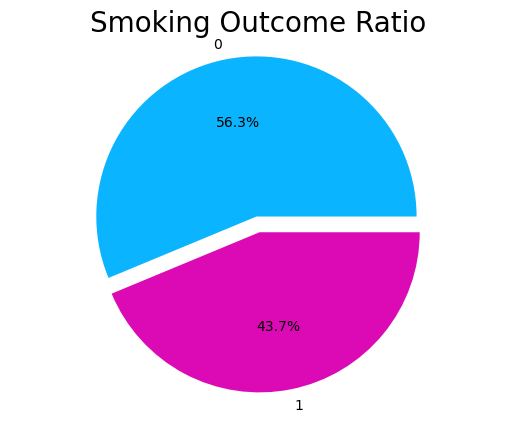

In [65]:
plt.pie(proportion_outcome , labels = proportion.index, autopct="%1.1f%%", explode = [0,0.1], colors = ["#0bb4ff","#dc0ab4"])
plt.title("Smoking Outcome Ratio", fontsize=20)
plt.axis("equal")
plt.show()

### Percentage of sample positive for smoking 

In [60]:
print(f"Smoking ratio = {sum(smoking['outcome']) / len(smoking):.4f}")

Smoking ratio = 0.4374


<div style="background-color: #ffa300; padding: 10px;">
    <h2>Data is imbalanced</h2>
 
</div>

## Combining 2 hearing features into 1 feature

In [15]:
smoking['hearing'] = ((smoking['hearing(left)'] + smoking['hearing(right)']) / 2)

In [16]:
smoking['hearing'].value_counts()

hearing
1.0    153836
1.5      3292
2.0      2128
Name: count, dtype: int64

### Dropping separate hearing features

In [17]:
smoking.drop(columns=['hearing(left)', 'hearing(right)'], inplace=True)

In [18]:
smoking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159256 entries, 0 to 159255
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       159256 non-null  int64  
 1   height(cm)                159256 non-null  int64  
 2   weight(kg)                159256 non-null  int64  
 3   waist                     159256 non-null  float64
 4   eyesight(left)            159256 non-null  float64
 5   eyesight(right)           159256 non-null  float64
 6   systolic_blood_pressure   159256 non-null  int64  
 7   diastolic_blood_pressure  159256 non-null  int64  
 8   fasting_blood_sugar       159256 non-null  int64  
 9   cholesterol               159256 non-null  int64  
 10  triglyceride              159256 non-null  int64  
 11  hdl                       159256 non-null  int64  
 12  ldl                       159256 non-null  int64  
 13  hemoglobin                159256 non-null  float6

## Investigating eyesight features 

In [19]:
smoking['eyesight(left)'].value_counts()

eyesight(left)
1.0    37380
1.2    36618
1.5    21550
0.9    15212
0.8    15078
0.7    13124
0.6     6769
0.5     5599
0.4     3337
0.3     2235
0.2      922
0.1      710
2.0      557
9.9      132
1.6       19
1.3        9
1.8        2
1.9        1
1.1        1
1.7        1
Name: count, dtype: int64

In [20]:
smoking['eyesight(right)'].value_counts()

eyesight(right)
1.0    38014
1.2    36302
1.5    20813
0.9    15719
0.8    15505
0.7    12144
0.6     6708
0.5     5838
0.4     3580
0.3     2116
0.2     1037
0.1      803
2.0      536
9.9      117
1.6       19
1.3        3
1.4        2
Name: count, dtype: int64

### 9.9 is an invalid entry in both eyesight features 

### 9.9 can either be 0.9 or 1.9 - as maximum value in the data is 2.0 for both features

In [21]:
# Print rows where eyesight(left) is '9.9'

filtered = smoking[(smoking["eyesight(left)"] == 9.9)]

columns_to_print=['eyesight(left)', 'eyesight(right)']
print(filtered[columns_to_print])

        eyesight(left)  eyesight(right)
id                                     
413                9.9              1.0
741                9.9              1.0
1117               9.9              0.1
1872               9.9              0.6
2733               9.9              0.9
...                ...              ...
155296             9.9              1.0
156153             9.9              0.6
156754             9.9              1.5
157807             9.9              0.8
157968             9.9              0.1

[132 rows x 2 columns]


In [22]:
# Print rows where eyesight(right) is '9.9'

filtered = smoking[(smoking["eyesight(right)"] == 9.9)]

columns_to_print=['eyesight(left)', 'eyesight(right)']
print(filtered[columns_to_print])

        eyesight(left)  eyesight(right)
id                                     
213                1.2              9.9
444                0.7              9.9
1624               1.2              9.9
1671               0.6              9.9
6135               9.9              9.9
...                ...              ...
153389             1.0              9.9
154961             1.5              9.9
156451             0.6              9.9
156920             1.2              9.9
158811             1.0              9.9

[117 rows x 2 columns]


In [23]:
# Print rows where both eyesight(left) and eyesight(right) are '9.9'

filtered = smoking[(smoking["eyesight(left)"] == 9.9) & (smoking["eyesight(right)"] == 9.9)]

columns_to_print=['eyesight(left)', 'eyesight(right)']
print(filtered[columns_to_print])

        eyesight(left)  eyesight(right)
id                                     
6135               9.9              9.9
13103              9.9              9.9
36394              9.9              9.9
40567              9.9              9.9
66187              9.9              9.9
72039              9.9              9.9
108316             9.9              9.9
141487             9.9              9.9


### 9.9 will be equated to 0.9 by as it is more likely to be systematic entry error in which number key 9 was mistakenly pressed instead of key 0 - as it is immediately adjacent to key 0 on the top number row of qwerty keyboard
### It is less likely to be 1, as key 1 is on the opposite side of key 0 on the number row, making key 1 less likely to be mistaken for key 0

In [24]:
smoking[['eyesight(left)', 'eyesight(right)']] = smoking[['eyesight(left)', 'eyesight(right)']].replace(9.9, 0.9)

In [25]:
smoking['eyesight(left)'].value_counts()

eyesight(left)
1.0    37380
1.2    36618
1.5    21550
0.9    15344
0.8    15078
0.7    13124
0.6     6769
0.5     5599
0.4     3337
0.3     2235
0.2      922
0.1      710
2.0      557
1.6       19
1.3        9
1.8        2
1.9        1
1.1        1
1.7        1
Name: count, dtype: int64

In [26]:
smoking['eyesight(right)'].value_counts()

eyesight(right)
1.0    38014
1.2    36302
1.5    20813
0.9    15836
0.8    15505
0.7    12144
0.6     6708
0.5     5838
0.4     3580
0.3     2116
0.2     1037
0.1      803
2.0      536
1.6       19
1.3        3
1.4        2
Name: count, dtype: int64

## Combining 2 eyesight features into 1 feature

In [27]:
smoking['eyesight'] = ((smoking['eyesight(left)'] + smoking['eyesight(right)']) / 2)

In [28]:
smoking['eyesight'].value_counts()

eyesight
1.10    19608
1.20    17667
1.00    16883
1.50    12017
1.35    11728
0.90    10959
0.95    10432
0.80     7265
0.75     7110
0.70     5662
1.05     4447
0.85     4280
1.25     4015
0.85     3805
0.55     3502
0.60     3357
0.65     3315
0.50     2672
0.65     1673
0.45     1503
0.40     1427
0.35     1020
1.75      645
0.60      629
0.25      606
0.45      511
0.30      476
1.15      451
0.90      346
0.20      314
0.30      253
0.10      168
2.00      160
0.40      151
1.60      101
0.15       75
1.30       10
1.40        8
1.55        1
1.30        1
1.55        1
1.45        1
1.80        1
Name: count, dtype: int64

### Dropping separate eyesight features

In [29]:
smoking.drop(columns=['eyesight(left)', 'eyesight(right)'], inplace=True)

In [30]:
smoking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159256 entries, 0 to 159255
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       159256 non-null  int64  
 1   height(cm)                159256 non-null  int64  
 2   weight(kg)                159256 non-null  int64  
 3   waist                     159256 non-null  float64
 4   systolic_blood_pressure   159256 non-null  int64  
 5   diastolic_blood_pressure  159256 non-null  int64  
 6   fasting_blood_sugar       159256 non-null  int64  
 7   cholesterol               159256 non-null  int64  
 8   triglyceride              159256 non-null  int64  
 9   hdl                       159256 non-null  int64  
 10  ldl                       159256 non-null  int64  
 11  hemoglobin                159256 non-null  float64
 12  urine_protein             159256 non-null  int64  
 13  serum_creatinine          159256 non-null  float6

## Investigating urine protein

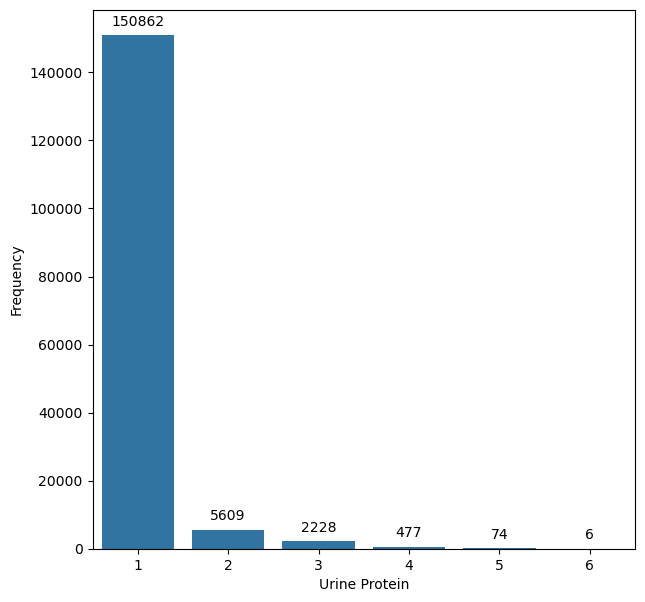

In [31]:
plt.figure(figsize=(7,7))
ax = sns.countplot(x = smoking['urine_protein'])

for p in ax.patches:
    ax.annotate(f'{p.get_height():g}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.xlabel('Urine Protein')
plt.ylabel('Frequency')
plt.show()

### Point to clarify: Are these dipstick measurement values as in 1+, 2+,...? Or categorical classifications for different stages of proteinuria?

### Until documentation becomes available for clarification, these values will be treated as categorical classification as it is highly unlikely that everyone in the sample has 1+ proteinuria 


## Investigating dental caries


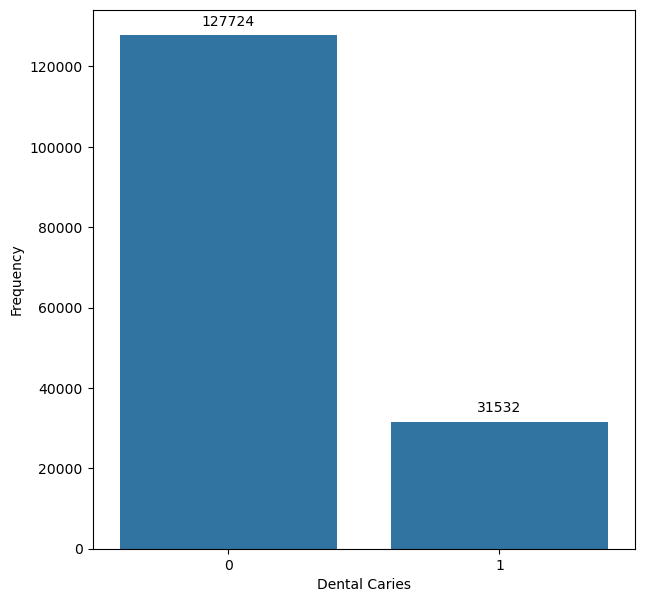

In [32]:
plt.figure(figsize=(7,7))
ax = sns.countplot(x = smoking['dental_caries'])

for p in ax.patches:
    ax.annotate(f'{p.get_height():g}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.xlabel('Dental Caries')
plt.ylabel('Frequency')
plt.show()

## Investigating fasting blood sugar 

#### Pre-diabetic : 100 mg/dl - 125 mg/dl
#### Diabetic : 126 mg/dl or more

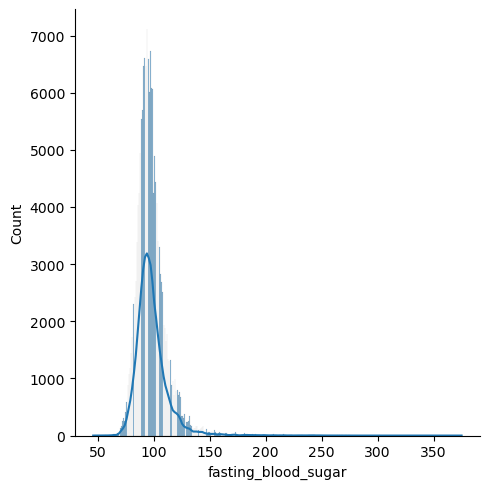

In [33]:
sns.displot(smoking['fasting_blood_sugar'], kde=True)

## Investigating serum creatinine 
### Normal ranges:
####          Adult male: 0.7 to 1.3 mg/dL 
####          Adult female: 0.6 to 1.1 mg/dL 

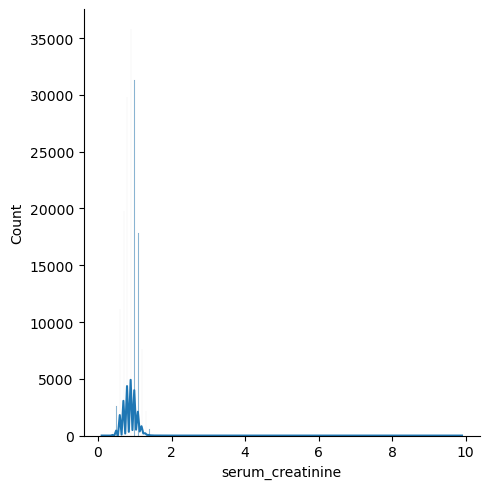

In [34]:
sns.displot(smoking['serum_creatinine'], kde=True)

## Creating new feature: Body Mass Index (BMI) 

In [35]:
smoking['bmi'] = smoking['weight(kg)'] / ((smoking['height(cm)'] / 100) ** 2)

### Dropping weight and height after creating BMI feature 

In [36]:
smoking.drop(columns=['height(cm)', 'weight(kg)'], inplace=True)

In [37]:
smoking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159256 entries, 0 to 159255
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       159256 non-null  int64  
 1   waist                     159256 non-null  float64
 2   systolic_blood_pressure   159256 non-null  int64  
 3   diastolic_blood_pressure  159256 non-null  int64  
 4   fasting_blood_sugar       159256 non-null  int64  
 5   cholesterol               159256 non-null  int64  
 6   triglyceride              159256 non-null  int64  
 7   hdl                       159256 non-null  int64  
 8   ldl                       159256 non-null  int64  
 9   hemoglobin                159256 non-null  float64
 10  urine_protein             159256 non-null  int64  
 11  serum_creatinine          159256 non-null  float64
 12  ast                       159256 non-null  int64  
 13  alt                       159256 non-null  int64 

## Creating separate dataframes of smokers and non-smokers 

In [38]:
smokers = smoking[smoking['outcome'] == 1]

In [39]:
non_smokers = smoking[smoking['outcome'] == 0]

## Investigating cholesterol and HDL (High Density Lipoprotein) relationship 

### Smokers + Non-smokers 

<Axes: xlabel='cholesterol', ylabel='hdl'>

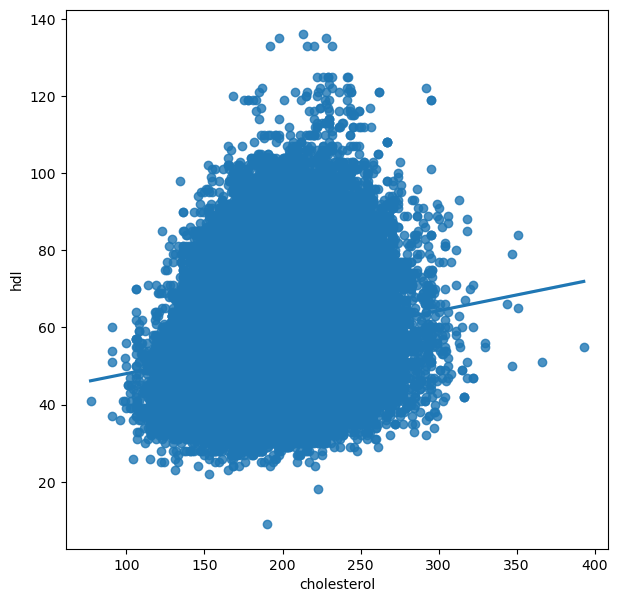

In [40]:
plt.subplots(figsize=(7, 7))
sns.regplot(data=smoking, x='cholesterol', y='hdl')

### Smokers only  

<Axes: xlabel='cholesterol', ylabel='hdl'>

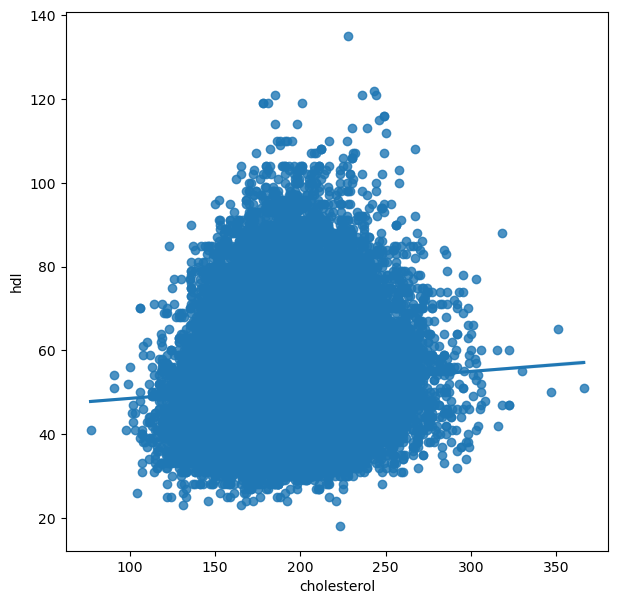

In [41]:
plt.subplots(figsize=(7, 7))
sns.regplot(data=smokers, x='cholesterol', y='hdl')

### Non-smokers only 

<Axes: xlabel='cholesterol', ylabel='hdl'>

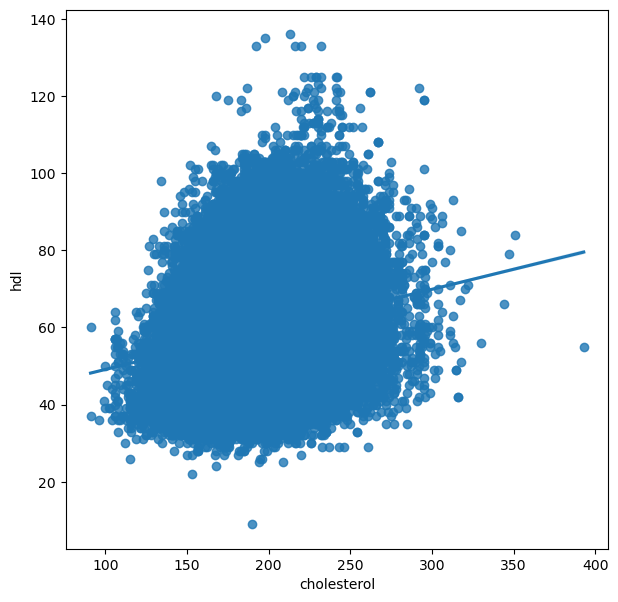

In [42]:
plt.subplots(figsize=(7, 7))
sns.regplot(data=non_smokers, x='cholesterol', y='hdl')

## Investigating cholesterol and triglyceride relationship 

### Smokers + Non-smokers

<Axes: xlabel='cholesterol', ylabel='triglyceride'>

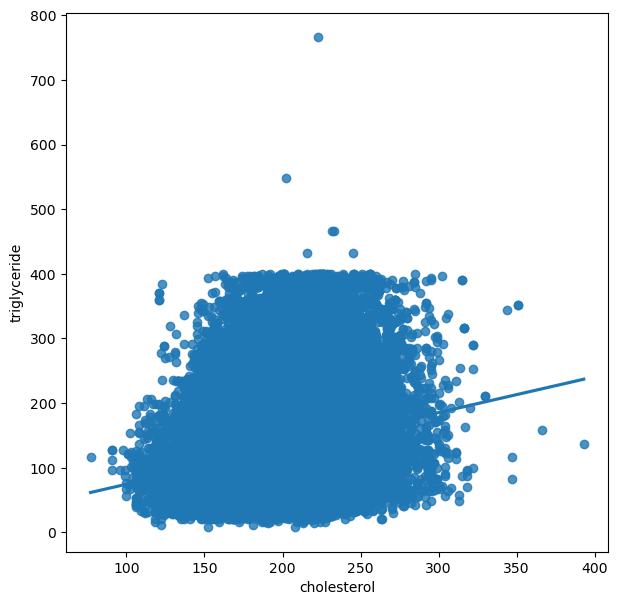

In [43]:
plt.subplots(figsize=(7, 7))
sns.regplot(data=smoking, x='cholesterol', y='triglyceride')

### Smokers only 

<Axes: xlabel='cholesterol', ylabel='triglyceride'>

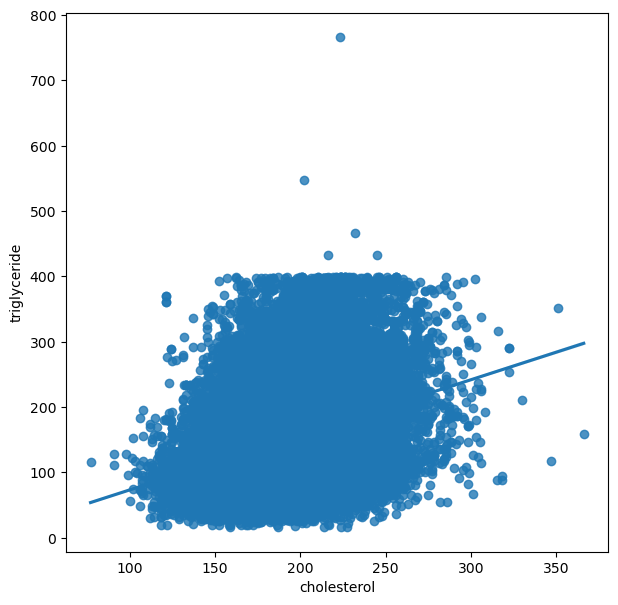

In [44]:
plt.subplots(figsize=(7, 7))
sns.regplot(data=smokers, x='cholesterol', y='triglyceride')

### Non-smokers only

<Axes: xlabel='cholesterol', ylabel='triglyceride'>

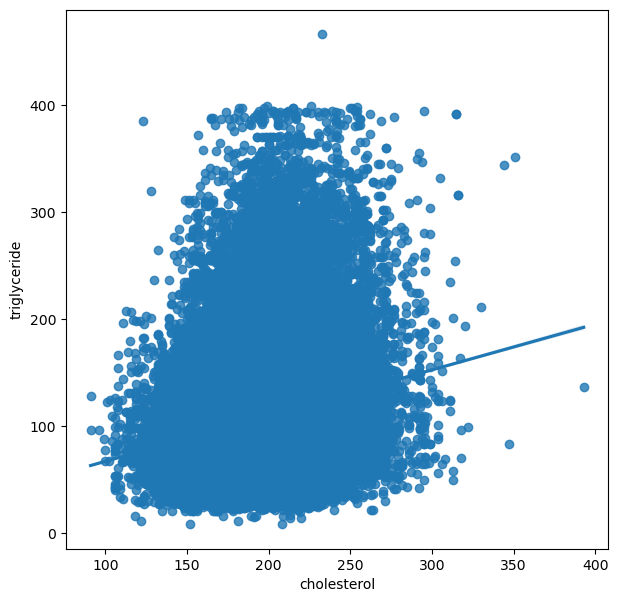

In [45]:
plt.subplots(figsize=(7, 7))
sns.regplot(data=non_smokers, x='cholesterol', y='triglyceride')

## Investigating HDL and triglyceride relationship

### Smokers + Non-smokers 

<Axes: xlabel='hdl', ylabel='triglyceride'>

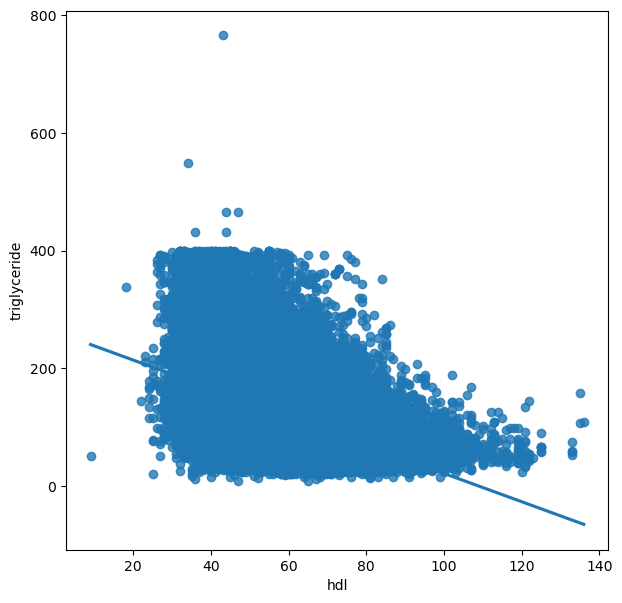

In [46]:
plt.subplots(figsize=(7, 7))
sns.regplot(data=smoking, x='hdl', y='triglyceride')

### Smokers only 

<Axes: xlabel='hdl', ylabel='triglyceride'>

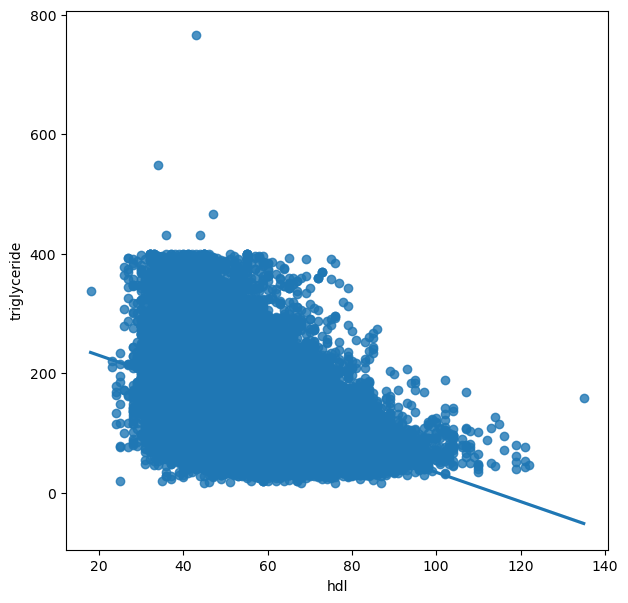

In [47]:
plt.subplots(figsize=(7, 7))
sns.regplot(data=smokers, x='hdl', y='triglyceride')

### Non-smokers only 

<Axes: xlabel='hdl', ylabel='triglyceride'>

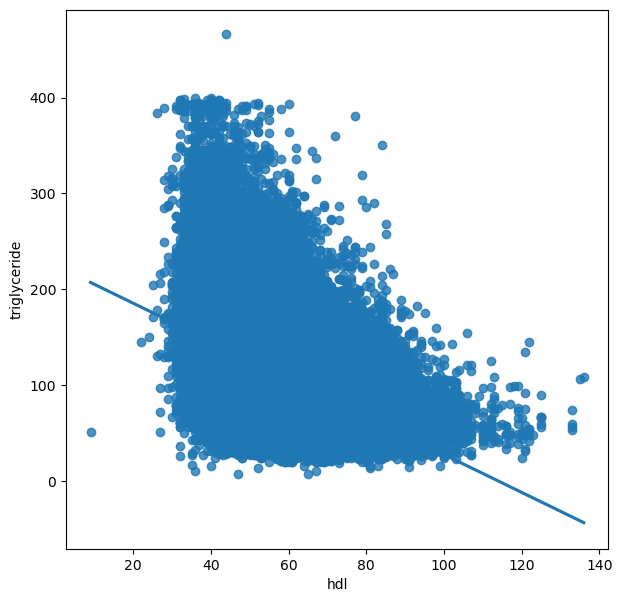

In [48]:
plt.subplots(figsize=(7, 7))
sns.regplot(data=non_smokers, x='hdl', y='triglyceride')

## Investigating cholesterol and fasting blood sugar relationship

### Smokers + Non-smokers 

<Axes: xlabel='cholesterol', ylabel='fasting_blood_sugar'>

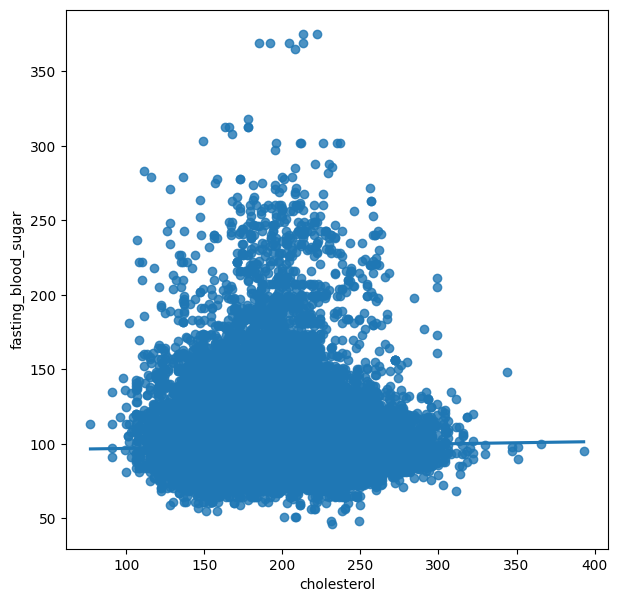

In [50]:
plt.subplots(figsize=(7, 7))
sns.regplot(data=smoking, x='cholesterol', y='fasting_blood_sugar')

### Smokers only  

<Axes: xlabel='cholesterol', ylabel='fasting_blood_sugar'>

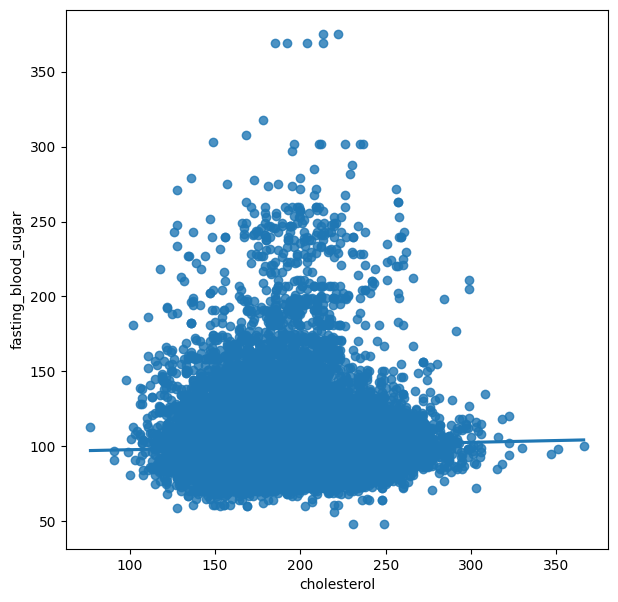

In [51]:
plt.subplots(figsize=(7, 7))
sns.regplot(data=smokers, x='cholesterol', y='fasting_blood_sugar')

### Non-smokers only 

<Axes: xlabel='cholesterol', ylabel='fasting_blood_sugar'>

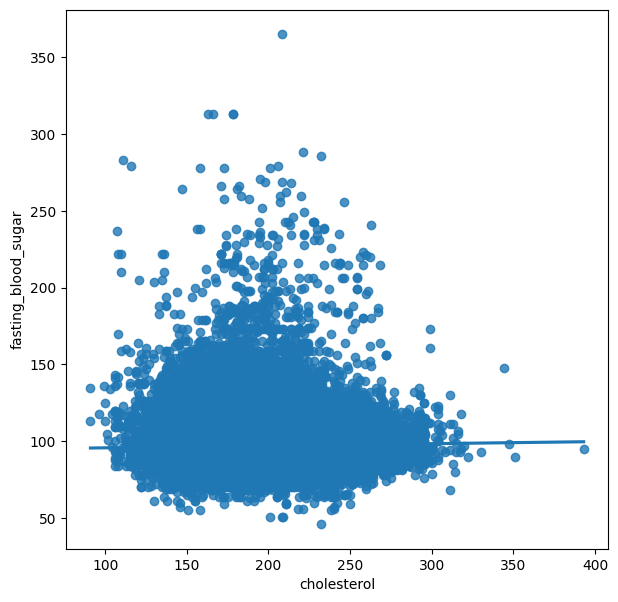

In [52]:
plt.subplots(figsize=(7, 7))
sns.regplot(data=non_smokers, x='cholesterol', y='fasting_blood_sugar')

## Investigating cholesterol and smoking relationship 

<Axes: xlabel='outcome', ylabel='cholesterol'>

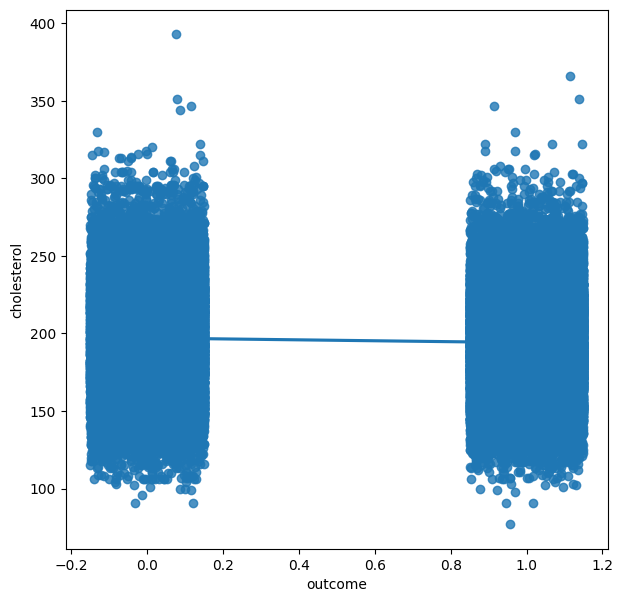

In [53]:
plt.subplots(figsize=(7, 7))
sns.regplot(data=smoking, x='outcome', y='cholesterol', x_jitter=.15)

## Investigating hemoglobin and smoking relationship 

<Axes: xlabel='outcome', ylabel='hemoglobin'>

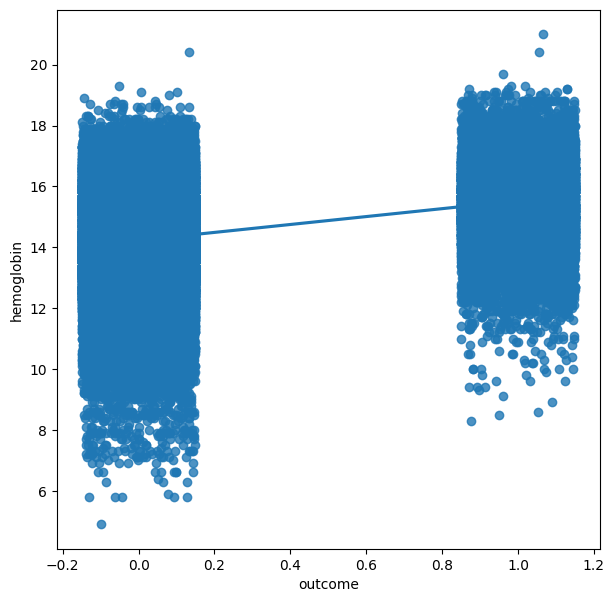

In [54]:
plt.subplots(figsize=(7, 7))
sns.regplot(data=smoking, x='outcome', y='hemoglobin', x_jitter=.15)

In [55]:
smoking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159256 entries, 0 to 159255
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       159256 non-null  int64  
 1   waist                     159256 non-null  float64
 2   systolic_blood_pressure   159256 non-null  int64  
 3   diastolic_blood_pressure  159256 non-null  int64  
 4   fasting_blood_sugar       159256 non-null  int64  
 5   cholesterol               159256 non-null  int64  
 6   triglyceride              159256 non-null  int64  
 7   hdl                       159256 non-null  int64  
 8   ldl                       159256 non-null  int64  
 9   hemoglobin                159256 non-null  float64
 10  urine_protein             159256 non-null  int64  
 11  serum_creatinine          159256 non-null  float64
 12  ast                       159256 non-null  int64  
 13  alt                       159256 non-null  int64 

## Checking correlation 

<Axes: >

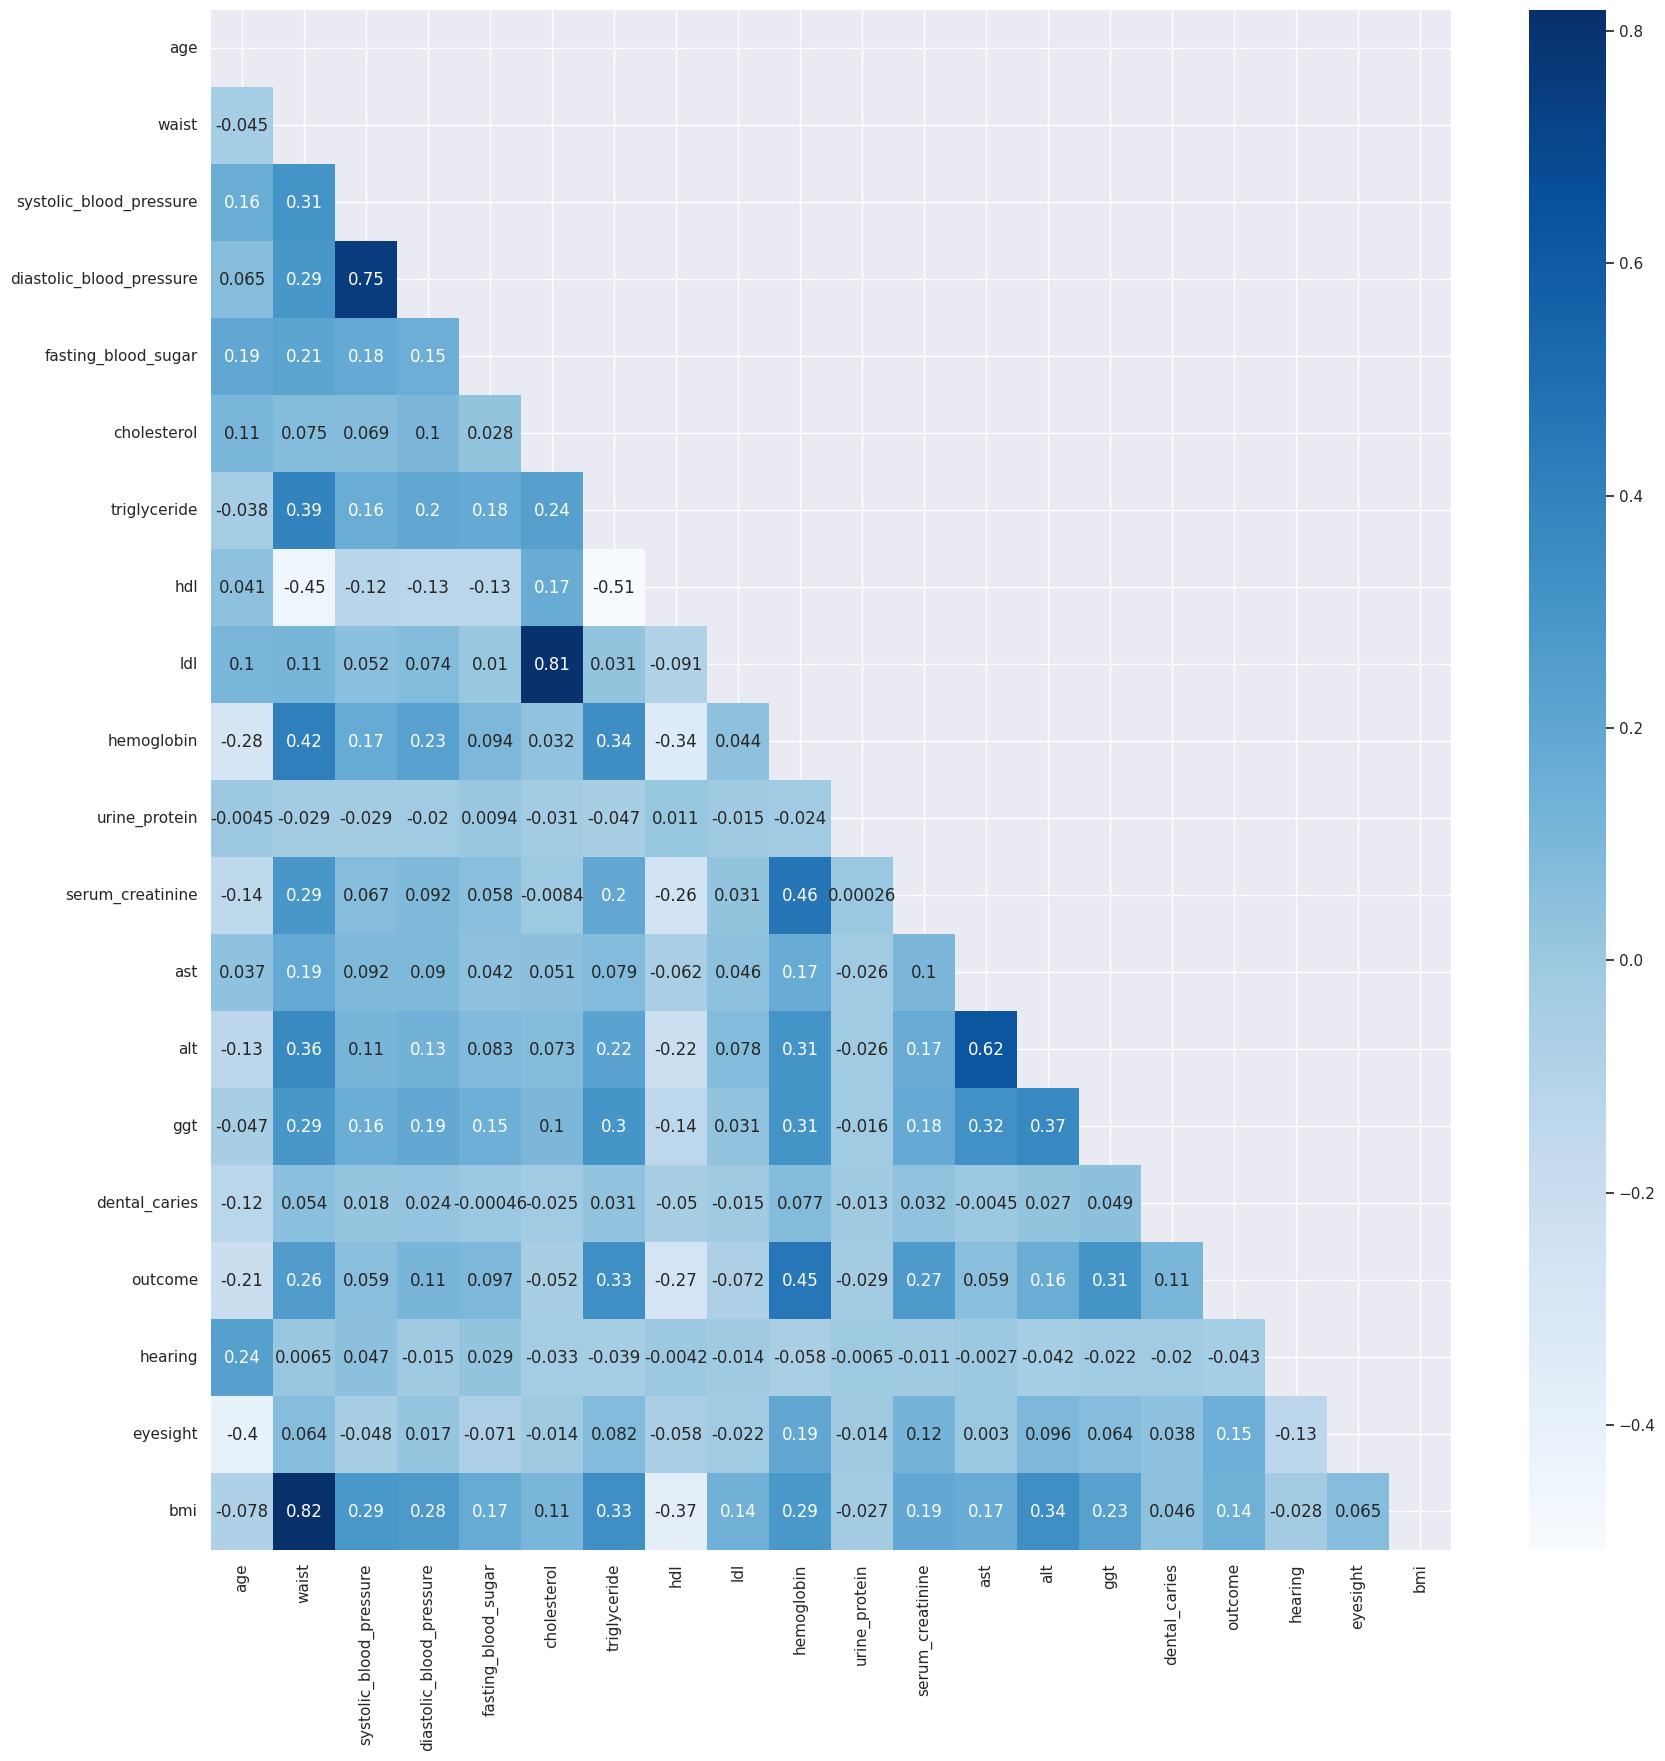

In [56]:
corr = smoking.corr()

# Get upper criangle of the co-relation matrix
matrix = np.triu(corr)


# Use upper triangle matrix as mask 
sns.set(rc={"figure.figsize":(20, 20)})   
sns.heatmap(corr, cmap="Blues", annot=True, mask=matrix)

## Checking outliers

### Detecting total outliers using isolation forest 

In [57]:
subset = smoking.drop(columns=['outcome'])

outlier_model = IsolationForest(n_estimators=100, max_samples='auto', max_features=1.0, contamination='auto')

In [58]:
predictions = outlier_model.fit_predict(subset)

# Create a DataFrame to store the outlier count for each row
outlier_count_df = pd.DataFrame({
    'outlier_count': [(pred == -1) for pred in predictions]
                                })

# Sum the counts for each row to get total outlier count
total_outliers = outlier_count_df['outlier_count'].sum()

# Attach the outlier count to the original dataframe
smoking['outlier_count'] = outlier_count_df

In [59]:
smoking['outlier_count'].value_counts()

outlier_count
False    151846
True       7410
Name: count, dtype: int64

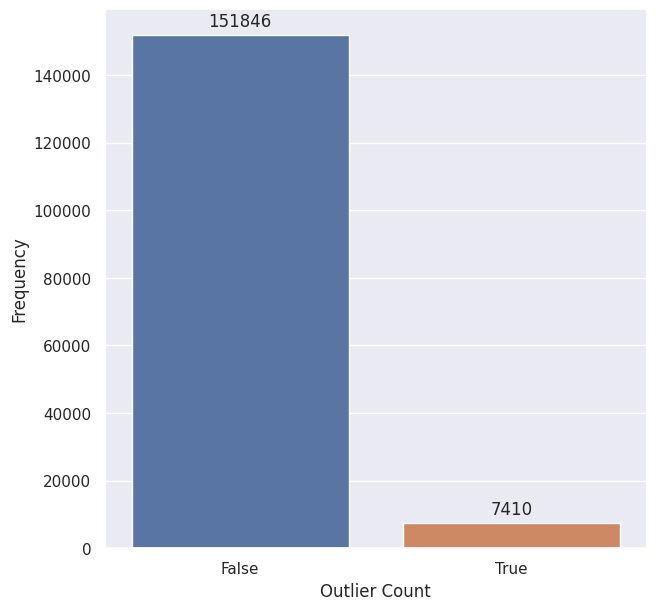

In [60]:
plt.figure(figsize=(7,7))
ax = sns.countplot(x = smoking['outlier_count'])

for p in ax.patches:
    ax.annotate(f'{p.get_height():g}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.xlabel('Outlier Count')
plt.ylabel('Frequency')
plt.show()

## Detecting outliers in individual features using box plots 

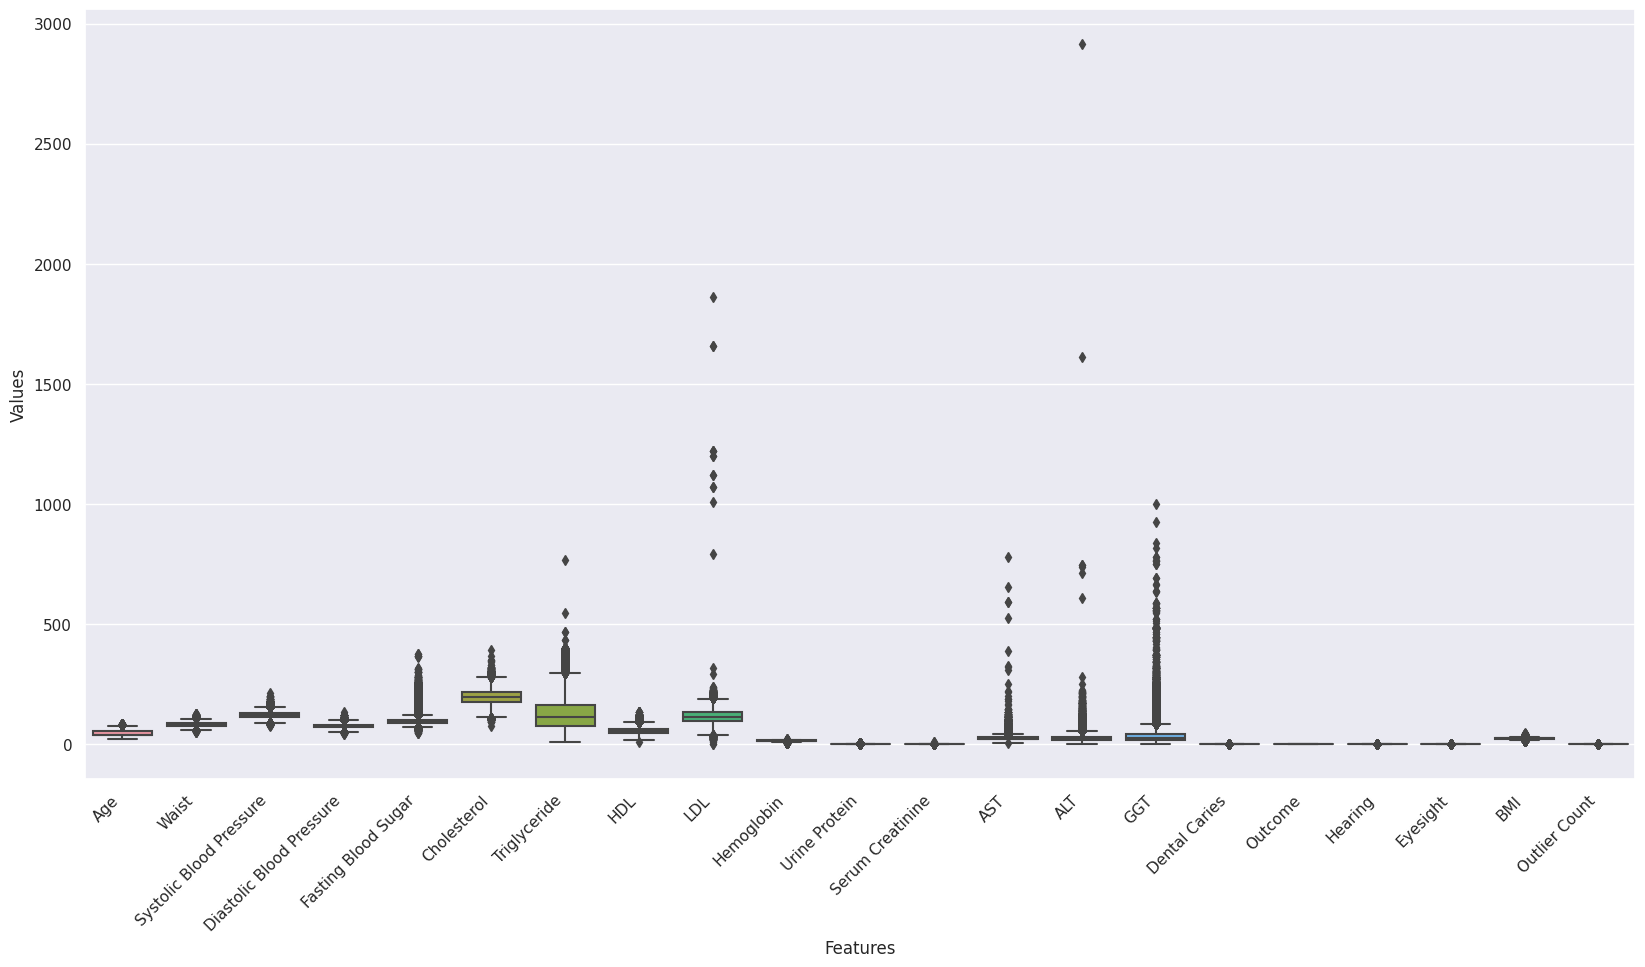

In [61]:
plt.subplots(figsize=(20, 10))
feature_names = ['Age', 'Waist', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Fasting Blood Sugar',
                 'Cholesterol', 'Triglyceride', 'HDL', 'LDL', 'Hemoglobin',
                 'Urine Protein', 'Serum Creatinine', 'AST', 'ALT', 'GGT',
                'Dental Caries', 'Outcome', 'Hearing', 'Eyesight', 'BMI', 'Outlier Count']

sns.boxplot(data=smoking)
plt.xticks(range(len(feature_names)), feature_names, rotation=45, ha="right")                # Rotate x-labels at a 45-degree angle for clarity 
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

## Inspecting individual box plots

### Fasting blood sugar 

<Axes: >

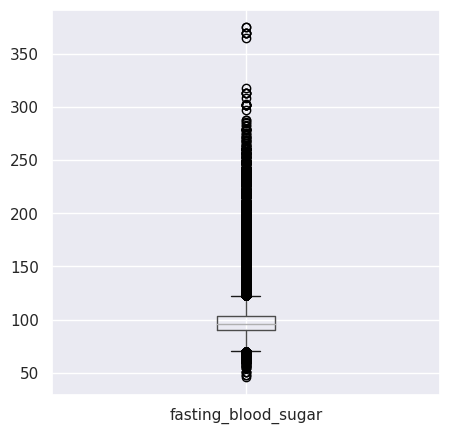

In [62]:
plt.subplots(figsize=(5, 5))
smoking[['fasting_blood_sugar']].boxplot()

### Cholesterol

<Axes: >

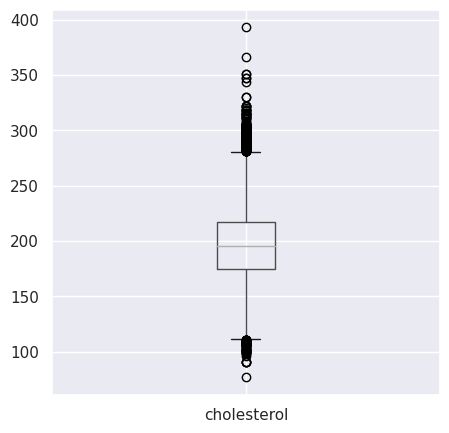

In [63]:
plt.subplots(figsize=(5, 5))
smoking[['cholesterol']].boxplot()

### Triglyceride

<Axes: >

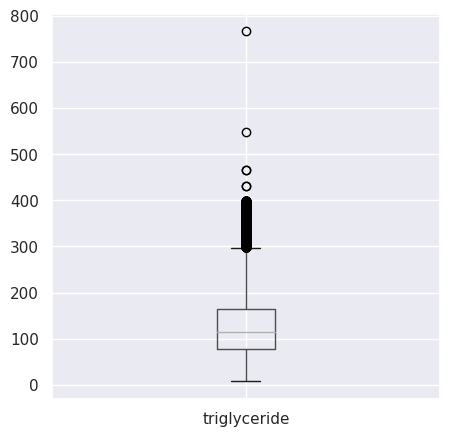

In [64]:
plt.subplots(figsize=(5, 5))
smoking[['triglyceride']].boxplot()

### HDL

<Axes: >

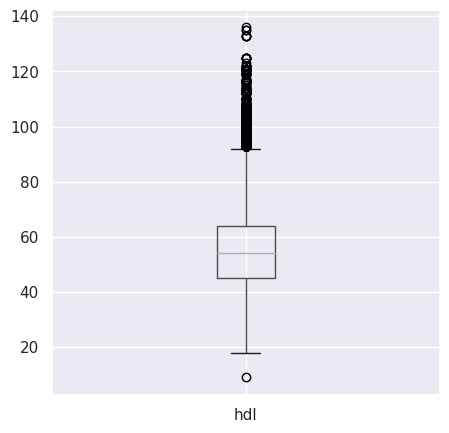

In [65]:
plt.subplots(figsize=(5, 5))
smoking[['hdl']].boxplot()

### LDL

<Axes: >

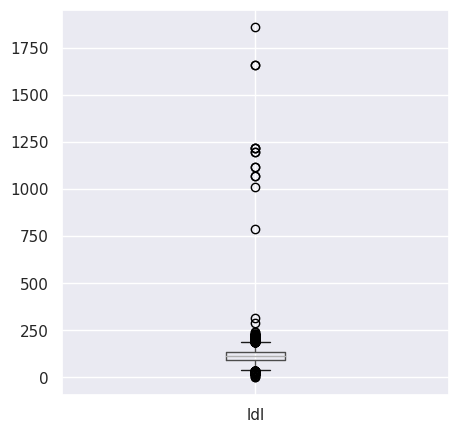

In [66]:
plt.subplots(figsize=(5, 5))
smoking[['ldl']].boxplot()

### AST - Aspartate Transaminase

<Axes: >

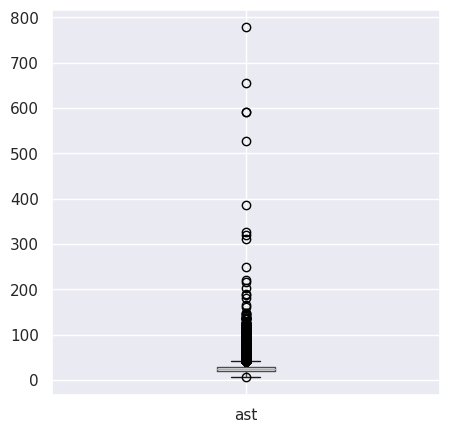

In [67]:
plt.subplots(figsize=(5, 5))
smoking[['ast']].boxplot()

### ALT - Alanine Transaminase

<Axes: >

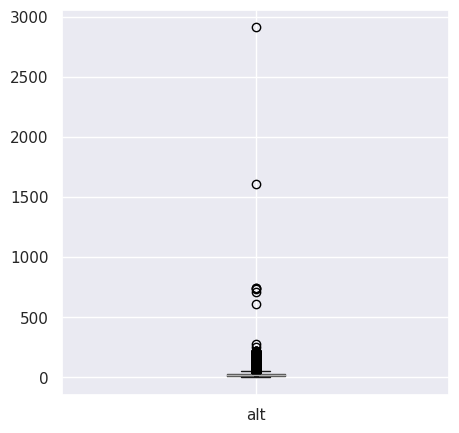

In [68]:
plt.subplots(figsize=(5, 5))
smoking[['alt']].boxplot()

### GGT - Gamma Glutamyl Transferase

<Axes: >

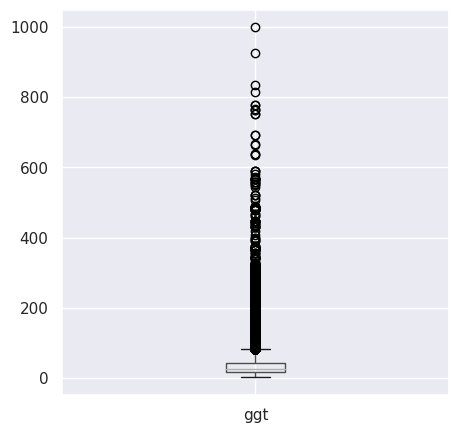

In [69]:
plt.subplots(figsize=(5, 5))
smoking[['ggt']].boxplot()

## Capping Outliers 

In [70]:
columns_to_cap = ['age', 
                  'waist', 
                  'systolic_blood_pressure', 
                  'diastolic_blood_pressure',
                  'fasting_blood_sugar', 'cholesterol', 'triglyceride', 'hdl', 'ldl',
                  'hemoglobin',
                  'urine_protein',
                  'serum_creatinine',
                  'ast',
                  'alt',
                  'ggt',
                  'bmi',
                 ]

In [71]:
def cap_outliers(data, columns):
    
    for column in columns:
       
        q1 = data[column].quantile(0.25)      # Get the Q1 (25 percentile) and Q3 (75 percentile)
        q3 = data[column].quantile(0.75)

        iqr = q3 - q1                         # Calculate interquartile range

        max_limit = q3 + (1.5 * iqr)          # Set limits
        min_limit = q1 - (1.5 * iqr)

        data[column] = np.clip(               # Cap outliers
                        data[column], 
                        a_min=min_limit, 
                        a_max=max_limit)     
    

In [72]:
cap_outliers(data=smoking, columns=columns_to_cap)

### Checking capping result

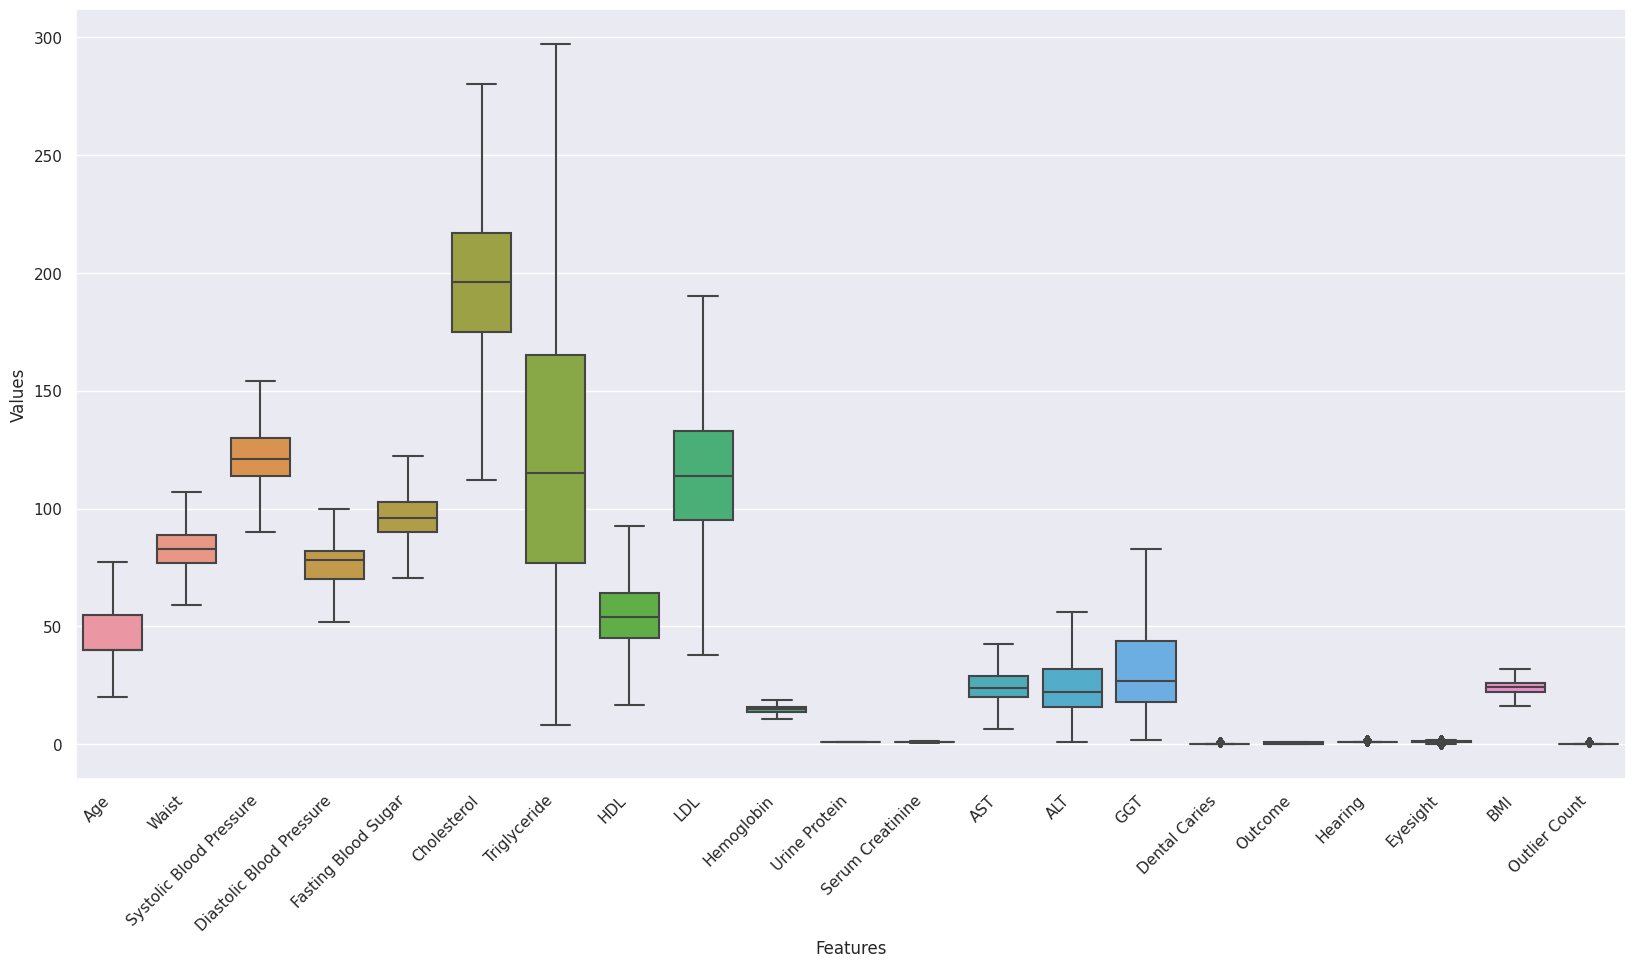

In [73]:
plt.subplots(figsize=(20, 10))
feature_names = ['Age', 'Waist', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Fasting Blood Sugar',
                 'Cholesterol', 'Triglyceride', 'HDL', 'LDL', 'Hemoglobin',
                 'Urine Protein', 'Serum Creatinine', 'AST', 'ALT', 'GGT',
                'Dental Caries', 'Outcome', 'Hearing', 'Eyesight', 'BMI', 'Outlier Count']

sns.boxplot(data=smoking)
plt.xticks(range(len(feature_names)), feature_names, rotation=45, ha="right")                # Rotate x-labels at a 45-degree angle for clarity 
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [74]:
smoking.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159256 entries, 0 to 159255
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       159256 non-null  float64
 1   waist                     159256 non-null  float64
 2   systolic_blood_pressure   159256 non-null  int64  
 3   diastolic_blood_pressure  159256 non-null  int64  
 4   fasting_blood_sugar       159256 non-null  float64
 5   cholesterol               159256 non-null  int64  
 6   triglyceride              159256 non-null  int64  
 7   hdl                       159256 non-null  float64
 8   ldl                       159256 non-null  int64  
 9   hemoglobin                159256 non-null  float64
 10  urine_protein             159256 non-null  int64  
 11  serum_creatinine          159256 non-null  float64
 12  ast                       159256 non-null  float64
 13  alt                       159256 non-null  int64 

# MODEL BUILDING 

In [105]:
!pip install dtreeviz

  Obtaining dependency information for dtreeviz from https://files.pythonhosted.org/packages/b3/e8/44eb59345d8ba9d2f6610df6441d63082f46021c1685de24716c22f55383/dtreeviz-2.2.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.4 MB/s eta 0:00:00-:--:--


In [147]:
!pip install graphviz

In [162]:
import optuna
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance, plot_tree, plotting
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, cross_val_score
from sklearn.metrics import (
    classification_report, precision_score, recall_score,
    accuracy_score, make_scorer, confusion_matrix,
    precision_recall_curve, roc_curve, auc, roc_auc_score, log_loss
)

import warnings
import dtreeviz
import graphviz

print(f"XGBoost Version: {xgboost.__version__}\nOptuna Version: {optuna.__version__}\nDtreeviz Version: {dtreeviz.__version__}\nGraphviz Version: {graphviz.__version__}")


XGBoost Version: 2.0.2
Optuna Version: 3.5.0
Dtreeviz Version: 2.2.2
Graphviz Version: 0.20.1


## Splitting data into the following sets:
#### Training set (80%)
#### Validation set (20%)

In [76]:
X = smoking.drop(columns=['outcome', 'outlier_count'])
y = smoking['outcome']

In [77]:
X_train, X_val, y_train, y_val = train_test_split(X, y,  stratify=y, test_size=0.20, random_state=7765)

### Checking stratification based on outcome 

In [78]:
sum(y_train)/len(y_train)

0.43736460393708204

## Scaling features

In [79]:
features_to_scale = [
             'age',
             'waist',
             'systolic_blood_pressure',
             'diastolic_blood_pressure',
             'fasting_blood_sugar',
             'cholesterol',
             'triglyceride',
             'hdl',
             'ldl',
             'hemoglobin',
             'serum_creatinine',
             'ast',
             'alt',
             'ggt',
             'bmi',
                   ]

### Defining scaling function 

In [80]:
def scale_features(df, features_to_scale, method):

    if method not in ['zscore', 'minmax', 'robust']:
        raise ValueError("Invalid Method: Choose one of the following scaling methods: 'Zscore', 'MinMax', or 'Robust'.")

    scaler = {
        'zscore': StandardScaler(),
        'minmax': MinMaxScaler(),
        'robust': RobustScaler()
             }[method]

    df[features_to_scale] = scaler.fit_transform(df[features_to_scale])       # Fit_transform creates copy of dataframe 
    
    print(df.info())

    return df

### Calling scaling function 

In [81]:
X_train = scale_features(df=X_train, features_to_scale=features_to_scale, method='zscore')

<class 'pandas.core.frame.DataFrame'>
Index: 127404 entries, 7797 to 157191
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       127404 non-null  float64
 1   waist                     127404 non-null  float64
 2   systolic_blood_pressure   127404 non-null  float64
 3   diastolic_blood_pressure  127404 non-null  float64
 4   fasting_blood_sugar       127404 non-null  float64
 5   cholesterol               127404 non-null  float64
 6   triglyceride              127404 non-null  float64
 7   hdl                       127404 non-null  float64
 8   ldl                       127404 non-null  float64
 9   hemoglobin                127404 non-null  float64
 10  urine_protein             127404 non-null  int64  
 11  serum_creatinine          127404 non-null  float64
 12  ast                       127404 non-null  float64
 13  alt                       127404 non-null  flo

In [82]:
X_val = scale_features(df=X_val, features_to_scale=features_to_scale, method='zscore')

<class 'pandas.core.frame.DataFrame'>
Index: 31852 entries, 55440 to 117460
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       31852 non-null  float64
 1   waist                     31852 non-null  float64
 2   systolic_blood_pressure   31852 non-null  float64
 3   diastolic_blood_pressure  31852 non-null  float64
 4   fasting_blood_sugar       31852 non-null  float64
 5   cholesterol               31852 non-null  float64
 6   triglyceride              31852 non-null  float64
 7   hdl                       31852 non-null  float64
 8   ldl                       31852 non-null  float64
 9   hemoglobin                31852 non-null  float64
 10  urine_protein             31852 non-null  int64  
 11  serum_creatinine          31852 non-null  float64
 12  ast                       31852 non-null  float64
 13  alt                       31852 non-null  float64
 14  ggt   

## Tuning hyperparameters - using NVIDIA GPU

### Checking GPU status

In [83]:
!nvidia-smi

Mon Dec 25 09:10:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:00:05.0 Off |                    0 |
| N/A   

In [84]:
# Warning ignore calls - if required 
# warnings.simplefilter(action='ignore', category=FutureWarning)
# warnings.simplefilter(action='ignore', category=UserWarning)

### Performing step-wise optimization to reduce tuning time 

### Setting max_depth=0 due to usage of loss guide grow policy (as this policy reduces model training time via histogram aggregation)

In [85]:
%%time 

def objective_sort(trial):
    
    params = {
        'booster': trial.suggest_categorical('booster', ['gbtree', 'dart']), 
        'max_leaves': trial.suggest_int('max_leaves', 5, 100),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 150),
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0, 1),
        'learning_rate': trial.suggest_float('learning_rate', 0, 0.5),
        'alpha': trial.suggest_float('alpha', 0, 10), 
        'gamma': trial.suggest_float('gamma', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'eval_metric': 'auc',                                  # Set evaluation metric 
        'tree_method': 'hist',                                 # Use 'hist' for GPU acceleration
        'device': 'cuda'                                       # Specify GPU device
             }
    
   
    model = XGBClassifier(
                    **params, 
                    n_jobs=-1, 
                    objective="binary:logistic",
                    grow_policy='lossguide',
                    max_depth=0,
                    early_stopping_rounds=500, 
                    random_state=1142
                         )
        
    model.fit(        
        X_train, 
        y_train, 
        eval_set=[(X_val,y_val)],
        verbose=0)

    y_pred = model.predict(X_val)

    return roc_auc_score(y_val, y_pred)



sampler = optuna.samplers.RandomSampler(seed=10)
study = optuna.create_study(sampler=sampler,direction='maximize')
study.optimize(objective_sort, n_trials=100)

[I 2023-12-25 09:10:23,679] A new study created in memory with name: no-name-defebf65-ef97-4f82-a9d2-be7e7be90719
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [09:10:26] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
[I 2023-12-25 09:10:26,089] Trial 0 finished with value: 0.7573009387170264 and parameters: {'booster': 'gbtree', 'max_leaves': 65, 'min_child_weight': 113, 'subsample': 0.7492535061512953, 'colsample_bytree': 0.22479664553084766, 'learning_rate': 0.09903143237981199, 'alpha': 7.605307121989587, 'gamma': 1.6911083656253545, 'reg

CPU times: user 4min 28s, sys: 1.24 s, total: 4min 29s
Wall time: 3min 30s


### Plotting hyperparameter importances 

In [87]:
fig = optuna.visualization.plot_param_importances(study)
fig.show()

### Tuning most important parameters 

In [89]:
from optuna.samplers import TPESampler
from optuna.pruners import HyperbandPruner

sampler = TPESampler()
pruner = HyperbandPruner()


def objective_1(trial):
    
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0, 0.5),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0, 1),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 150),
        'alpha': trial.suggest_float('alpha', 0, 10),  
        'eval_metric': 'auc',                                  # Set evaluation metric 
        'tree_method': 'hist',                                 # Use 'hist' for GPU acceleration
        'device': 'cuda'                                       # Specify GPU device
             }
    
   
    model = XGBClassifier(
                    **params, 
                    n_jobs=-1, 
                    objective="binary:logistic",
                    grow_policy='lossguide',
                    max_depth=0,
                    early_stopping_rounds=500, 
                    random_state=1142
                         )
        
    model.fit(        
        X_train, 
        y_train, 
        eval_set=[(X_val,y_val)],
        verbose=0)

    y_pred = model.predict(X_val)

    return roc_auc_score(y_val, y_pred)


study_1 = optuna.create_study(sampler=sampler, pruner=pruner, direction='maximize') # Direction set to maximize AUC
study_1.optimize(objective_1, n_trials=1000)

[I 2023-12-25 09:17:53,349] A new study created in memory with name: no-name-e3fd71f3-469b-474b-8d77-8480102e6433
[I 2023-12-25 09:17:55,493] Trial 0 finished with value: 0.7628107001701303 and parameters: {'learning_rate': 0.21259840219917642, 'colsample_bytree': 0.50201030455041, 'min_child_weight': 100, 'alpha': 9.291985810990061}. Best is trial 0 with value: 0.7628107001701303.
[I 2023-12-25 09:18:00,089] Trial 1 finished with value: 0.754318452125829 and parameters: {'learning_rate': 0.4761953851066734, 'colsample_bytree': 0.5300818957972285, 'min_child_weight': 32, 'alpha': 7.401179217240865}. Best is trial 0 with value: 0.7628107001701303.
[I 2023-12-25 09:18:01,843] Trial 2 finished with value: 0.7678171900425276 and parameters: {'learning_rate': 0.18729027464449105, 'colsample_bytree': 0.8865971488236687, 'min_child_weight': 148, 'alpha': 0.25164759199168274}. Best is trial 2 with value: 0.7678171900425276.
[I 2023-12-25 09:18:06,328] Trial 3 finished with value: 0.75483418678

In [90]:
optuna.visualization.plot_optimization_history(study_1).show()

In [91]:
best_params_1 = study_1.best_params # Get best hyperparameters for the model 
print('Best Parameters:')

for key, value in study_1.best_params.items():
    print(f"\t{key}: {value}")

Best Parameters:
	learning_rate: 0.09435946314631741
	colsample_bytree: 0.6876817638607892
	min_child_weight: 43
	alpha: 8.530789351841825


### Tuning remaining parameters 

In [93]:
def objective_2(trial):
    
    params = {
        'gamma': trial.suggest_float('gamma', 0, 10),
        'max_leaves': trial.suggest_int('max_leaves', 5, 100),      
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10), 
        'booster': trial.suggest_categorical('booster', ['gbtree', 'dart']), 
        'eval_metric': 'auc',                                  # Set evaluation metric 
        'tree_method': 'hist',                                 # Use 'hist' for GPU acceleration
        'device': 'cuda'                                       # Specify GPU device
             }
    
   
    model = XGBClassifier(
                    **params, 
                    n_jobs=-1, 
                    objective="binary:logistic",
                    grow_policy='lossguide',
                    max_depth=0,
                    learning_rate=best_params_1['learning_rate'],    
                    colsample_bytree=best_params_1['colsample_bytree'],
                    min_child_weight=best_params_1['min_child_weight'],
                    alpha=best_params_1['alpha'],
                    early_stopping_rounds=500, 
                    random_state=1142
                         )
        
    model.fit(        
        X_train, 
        y_train, 
        eval_set=[(X_val,y_val)],
        verbose=0)

    y_pred = model.predict(X_val)

    return roc_auc_score(y_val, y_pred)




study_2 = optuna.create_study(sampler=sampler, pruner=pruner, direction='maximize') # Direction set to maximize AUC
study_2.optimize(objective_2, n_trials=1000)

[I 2023-12-25 10:14:28,898] A new study created in memory with name: no-name-8f38bac5-38ea-426c-a1dc-e242052df558
[I 2023-12-25 10:14:32,250] Trial 0 finished with value: 0.7657382254535635 and parameters: {'gamma': 1.3518465805828195, 'max_leaves': 13, 'subsample': 0.6442909931261307, 'reg_lambda': 9.053446647128556, 'booster': 'dart'}. Best is trial 0 with value: 0.7657382254535635.
[I 2023-12-25 10:14:33,138] Trial 1 finished with value: 0.7684090650272641 and parameters: {'gamma': 7.826178781120704, 'max_leaves': 70, 'subsample': 0.5893164529746432, 'reg_lambda': 6.2873052714823885, 'booster': 'gbtree'}. Best is trial 1 with value: 0.7684090650272641.
[I 2023-12-25 10:14:36,939] Trial 2 finished with value: 0.7674790046622723 and parameters: {'gamma': 1.1268281377325184, 'max_leaves': 30, 'subsample': 0.5934844265929606, 'reg_lambda': 1.2875580903627681, 'booster': 'dart'}. Best is trial 1 with value: 0.7684090650272641.
[I 2023-12-25 10:14:38,208] Trial 3 finished with value: 0.76

In [94]:
optuna.visualization.plot_optimization_history(study_2).show()

In [95]:
best_params_2 = study_2.best_params # Get best hyperparameters for the model 
print('Best Parameters:')

for key, value in study_2.best_params.items():
    print(f"\t{key}: {value}")

Best Parameters:
	gamma: 2.623493340903408
	max_leaves: 57
	subsample: 0.7671239943114051
	reg_lambda: 4.412656307536986
	booster: gbtree


## Plugging in best hyperparameters

In [99]:
xgboost_model = XGBClassifier(  
                    n_jobs=-1, 
                    objective="binary:logistic",
                    grow_policy = 'lossguide',
                    booster=best_params_2['booster'],
                    max_leaves=best_params_2['max_leaves'],
                    min_child_weight=best_params_1['min_child_weight'],
                    subsample=best_params_2['subsample'],
                    colsample_bytree=best_params_1['colsample_bytree'],
                    learning_rate=best_params_1['learning_rate'],
                    alpha=best_params_1['alpha'],
                    gamma=best_params_2['gamma'],
                    reg_lambda=best_params_2['reg_lambda'],
                    max_depth=0,
                    tree_method='hist',
                    device='cuda',                            # Set device to 'cuda' for GPU training
                    random_state=1142
                         )
    

## Running 10-fold stratified cross validation 

In [100]:
%%time

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

training_scores = []
validation_scores = []

# Iterate over each fold
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    model = xgboost_model.fit(X_train, y_train)

    # Evaluate the model and store the accuracy score
    training = xgboost_model.score(X_train, y_train)
    validation = xgboost_model.score(X_val, y_val)
    training_scores.append(training)
    validation_scores.append(validation)

for i, (train, test) in enumerate(zip(training_scores, validation_scores), 1):
    print(f'Fold {i}: Training set accuracy = {train:.4f}, Validation set accuracy = {test:.4f}')

print(f'Average Training set accuracy: {np.mean(training_scores):.4f}')
print(f'Average Validation set accuracy: {np.mean(validation_scores):.4f}')


Fold 1: Training set accuracy = 0.7908, Validation set accuracy = 0.7728
Fold 2: Training set accuracy = 0.7910, Validation set accuracy = 0.7827
Fold 3: Training set accuracy = 0.7896, Validation set accuracy = 0.7835
Fold 4: Training set accuracy = 0.7908, Validation set accuracy = 0.7753
Fold 5: Training set accuracy = 0.7907, Validation set accuracy = 0.7835
Fold 6: Training set accuracy = 0.7906, Validation set accuracy = 0.7792
Fold 7: Training set accuracy = 0.7912, Validation set accuracy = 0.7743
Fold 8: Training set accuracy = 0.7907, Validation set accuracy = 0.7762
Fold 9: Training set accuracy = 0.7901, Validation set accuracy = 0.7829
Fold 10: Training set accuracy = 0.7904, Validation set accuracy = 0.7800
Average Training set accuracy: 0.7906
Average Validation set accuracy: 0.7790
CPU times: user 19.7 s, sys: 113 ms, total: 19.8 s
Wall time: 12.5 s


### Average scores of training and test set indicate overfitting on training set 

In [101]:
# Selecting Fold 3 because of highest testing set accuracy and lower training set accuracy than Fold 5   

model_number = 3
for i, (train_index, test_index) in enumerate(stratified_kfold.split(X, y), 1):
    if i == model_number:
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        y_train, y_val = y.iloc[train_index], y.iloc[test_index]

xgboost_model.fit(X_train, y_train)

XGBClassifier(alpha=8.530789351841825, base_score=None, booster='gbtree',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6876817638607892, device='cuda',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=2.623493340903408,
              grow_policy='lossguide', importance_type=None,
              interaction_constraints=None, learning_rate=0.09435946314631741,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=0, max_leaves=57,
              min_child_weight=43, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, ...)

## Obtaining feature importances (according to gain)

### Larger the gain, larger the improvement in accuracy by splitting on that feature

In [129]:
feature_importances_gain = xgboost_model.get_booster().get_score(importance_type='gain')

print("Feature Importances:")
for feature, importance in sorted(feature_importances.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")

Feature Importances:
hemoglobin: 266.9488525390625
ggt: 141.44691467285156
serum_creatinine: 58.91447067260742
triglyceride: 53.1583137512207
age: 45.16299819946289
dental_caries: 29.37017822265625
ldl: 25.775789260864258
cholesterol: 22.66829490661621
hdl: 20.35094451904297
bmi: 17.58115005493164
alt: 15.39764404296875
ast: 15.385200500488281
waist: 11.930818557739258
systolic_blood_pressure: 10.403719902038574
diastolic_blood_pressure: 9.177324295043945
fasting_blood_sugar: 8.967534065246582
eyesight: 8.943336486816406
hearing: 7.290012836456299


## Plotting feature importances (according to gain)

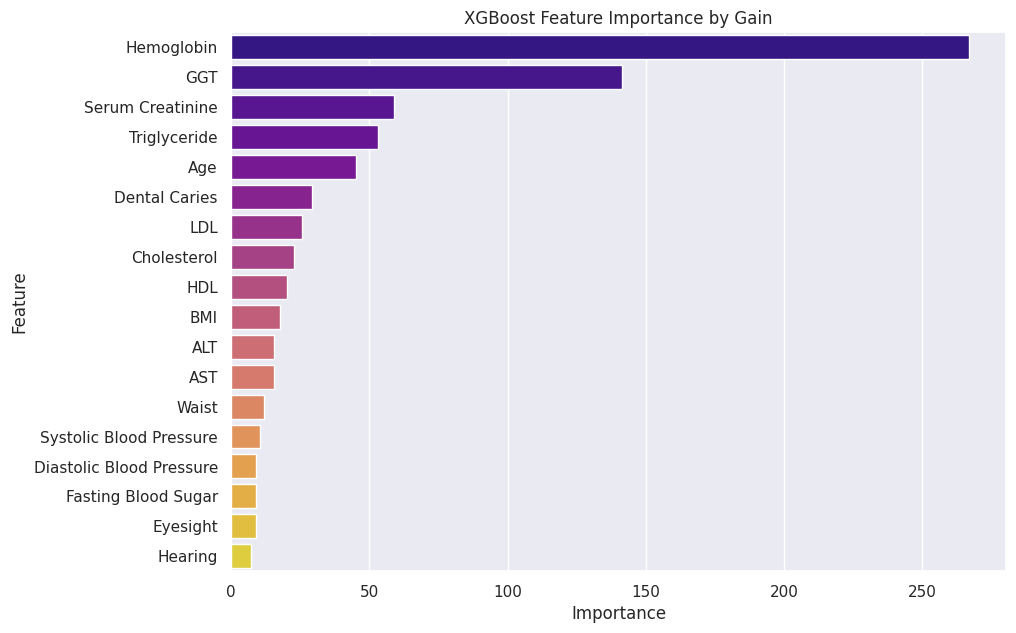

In [139]:
feature_df = pd.DataFrame({'Feature': list(feature_importances_gain.keys()), 'Importance': list(feature_importances_gain.values())})

replace_dict = {
    'age': 'Age',
    'waist': 'Waist',
    'systolic_blood_pressure': 'Systolic Blood Pressure',
    'diastolic_blood_pressure': 'Diastolic Blood Pressure',
    'fasting_blood_sugar': 'Fasting Blood Sugar',
    'cholesterol': 'Cholesterol',
    'triglyceride': 'Triglyceride',
    'hdl': 'HDL',
    'ldl': 'LDL',
    'eyesight': 'Eyesight',
    'hearing': 'Hearing',
    'hemoglobin': 'Hemoglobin',
    'urine_protein': 'Urine Protein',
    'serum_creatinine': 'Serum Creatinine',
    'ast': 'AST',
    'alt': 'ALT',
    'ggt': 'GGT',
    'dental_caries': 'Dental Caries',
    'bmi': 'BMI'
             }

feature_df['Feature'] = feature_df['Feature'].replace(replace_dict)

feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.subplots(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='plasma').set(
    title='XGBoost Feature Importance by Gain', xlabel='Importance', ylabel='Feature',
            )
plt.show()

## Obtaining feature importances (according to coverage)

### Larger the coverage, larger the impact on Hessian derivative of the loss function 

In [135]:
feature_importances_cover = xgboost_model.get_booster().get_score(importance_type='cover')

print("Feature Importances:")
for feature, importance in sorted(feature_importances.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")

Feature Importances:
hemoglobin: 266.9488525390625
ggt: 141.44691467285156
serum_creatinine: 58.91447067260742
triglyceride: 53.1583137512207
age: 45.16299819946289
dental_caries: 29.37017822265625
ldl: 25.775789260864258
cholesterol: 22.66829490661621
hdl: 20.35094451904297
bmi: 17.58115005493164
alt: 15.39764404296875
ast: 15.385200500488281
waist: 11.930818557739258
systolic_blood_pressure: 10.403719902038574
diastolic_blood_pressure: 9.177324295043945
fasting_blood_sugar: 8.967534065246582
eyesight: 8.943336486816406
hearing: 7.290012836456299


## Plotting feature importances (according to coverage)

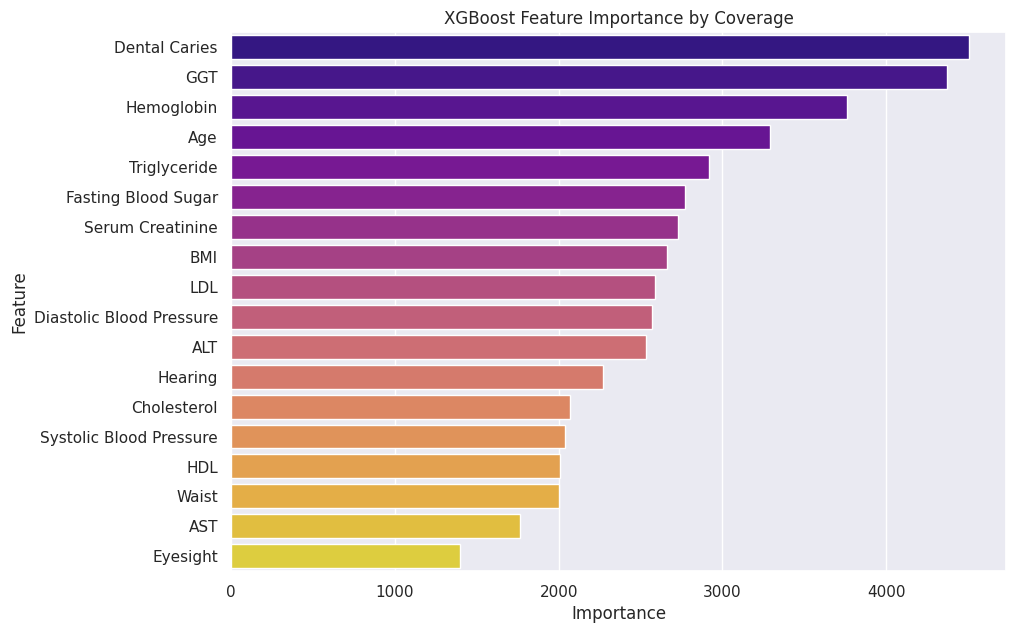

In [140]:
feature_df = pd.DataFrame({'Feature': list(feature_importances_cover.keys()), 'Importance': list(feature_importances_cover.values())})

replace_dict = {
    'age': 'Age',
    'waist': 'Waist',
    'systolic_blood_pressure': 'Systolic Blood Pressure',
    'diastolic_blood_pressure': 'Diastolic Blood Pressure',
    'fasting_blood_sugar': 'Fasting Blood Sugar',
    'cholesterol': 'Cholesterol',
    'triglyceride': 'Triglyceride',
    'hdl': 'HDL',
    'ldl': 'LDL',
    'eyesight': 'Eyesight',
    'hearing': 'Hearing',
    'hemoglobin': 'Hemoglobin',
    'urine_protein': 'Urine Protein',
    'serum_creatinine': 'Serum Creatinine',
    'ast': 'AST',
    'alt': 'ALT',
    'ggt': 'GGT',
    'dental_caries': 'Dental Caries',
    'bmi': 'BMI'
             }

feature_df['Feature'] = feature_df['Feature'].replace(replace_dict)

feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.subplots(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='plasma').set(
    title='XGBoost Feature Importance by Coverage', xlabel='Importance', ylabel='Feature',
            )
plt.show()

## Visualising model using graphviz library 

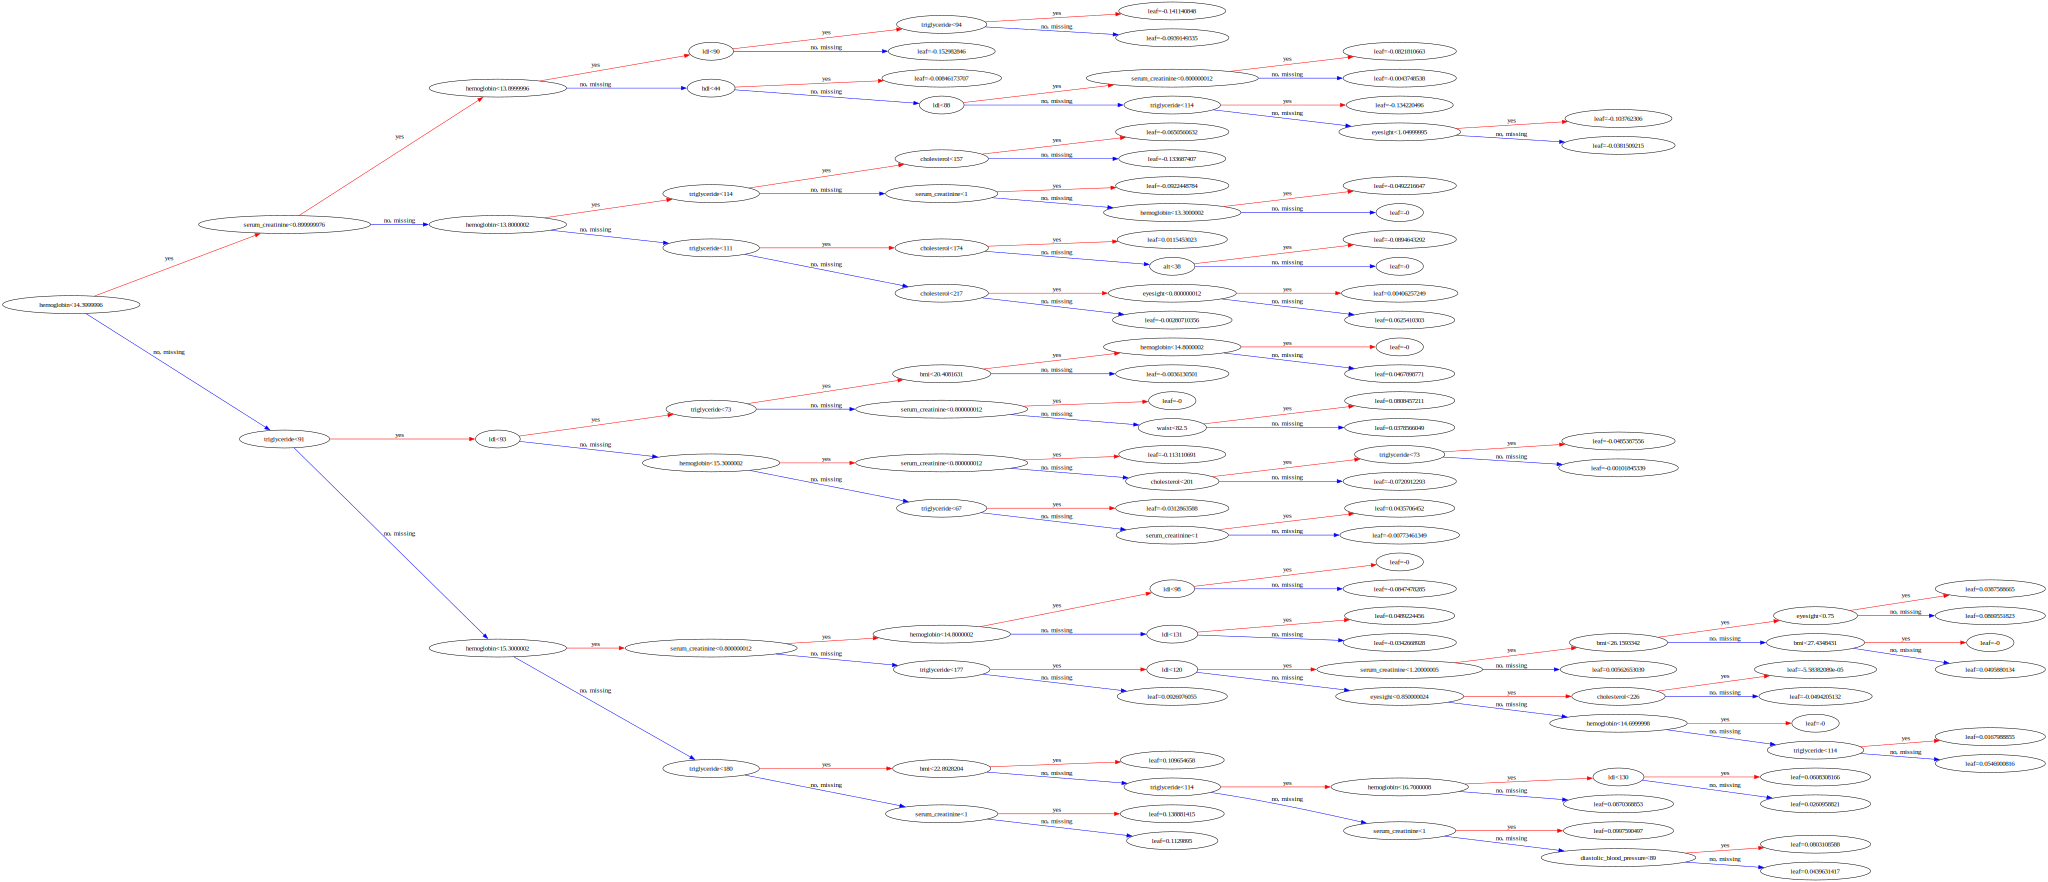

In [180]:
xgboost.to_graphviz(xgboost_model, num_trees=tree_index_to_plot, rankdir='LR')

## Visualising model using dtreeviz library

### Initialising dtreeviz adaptor 

In [175]:
features = list(X_train.columns)
target = 'outcome'

viz_model = dtreeviz.model(xgboost_model, tree_index=1,
                           X_train=X_train[features], y_train=smoking[target],
                           feature_names=features,
                           target_name=target, class_names=['Smoker', 'Non-smoker'])

### Visualising model 

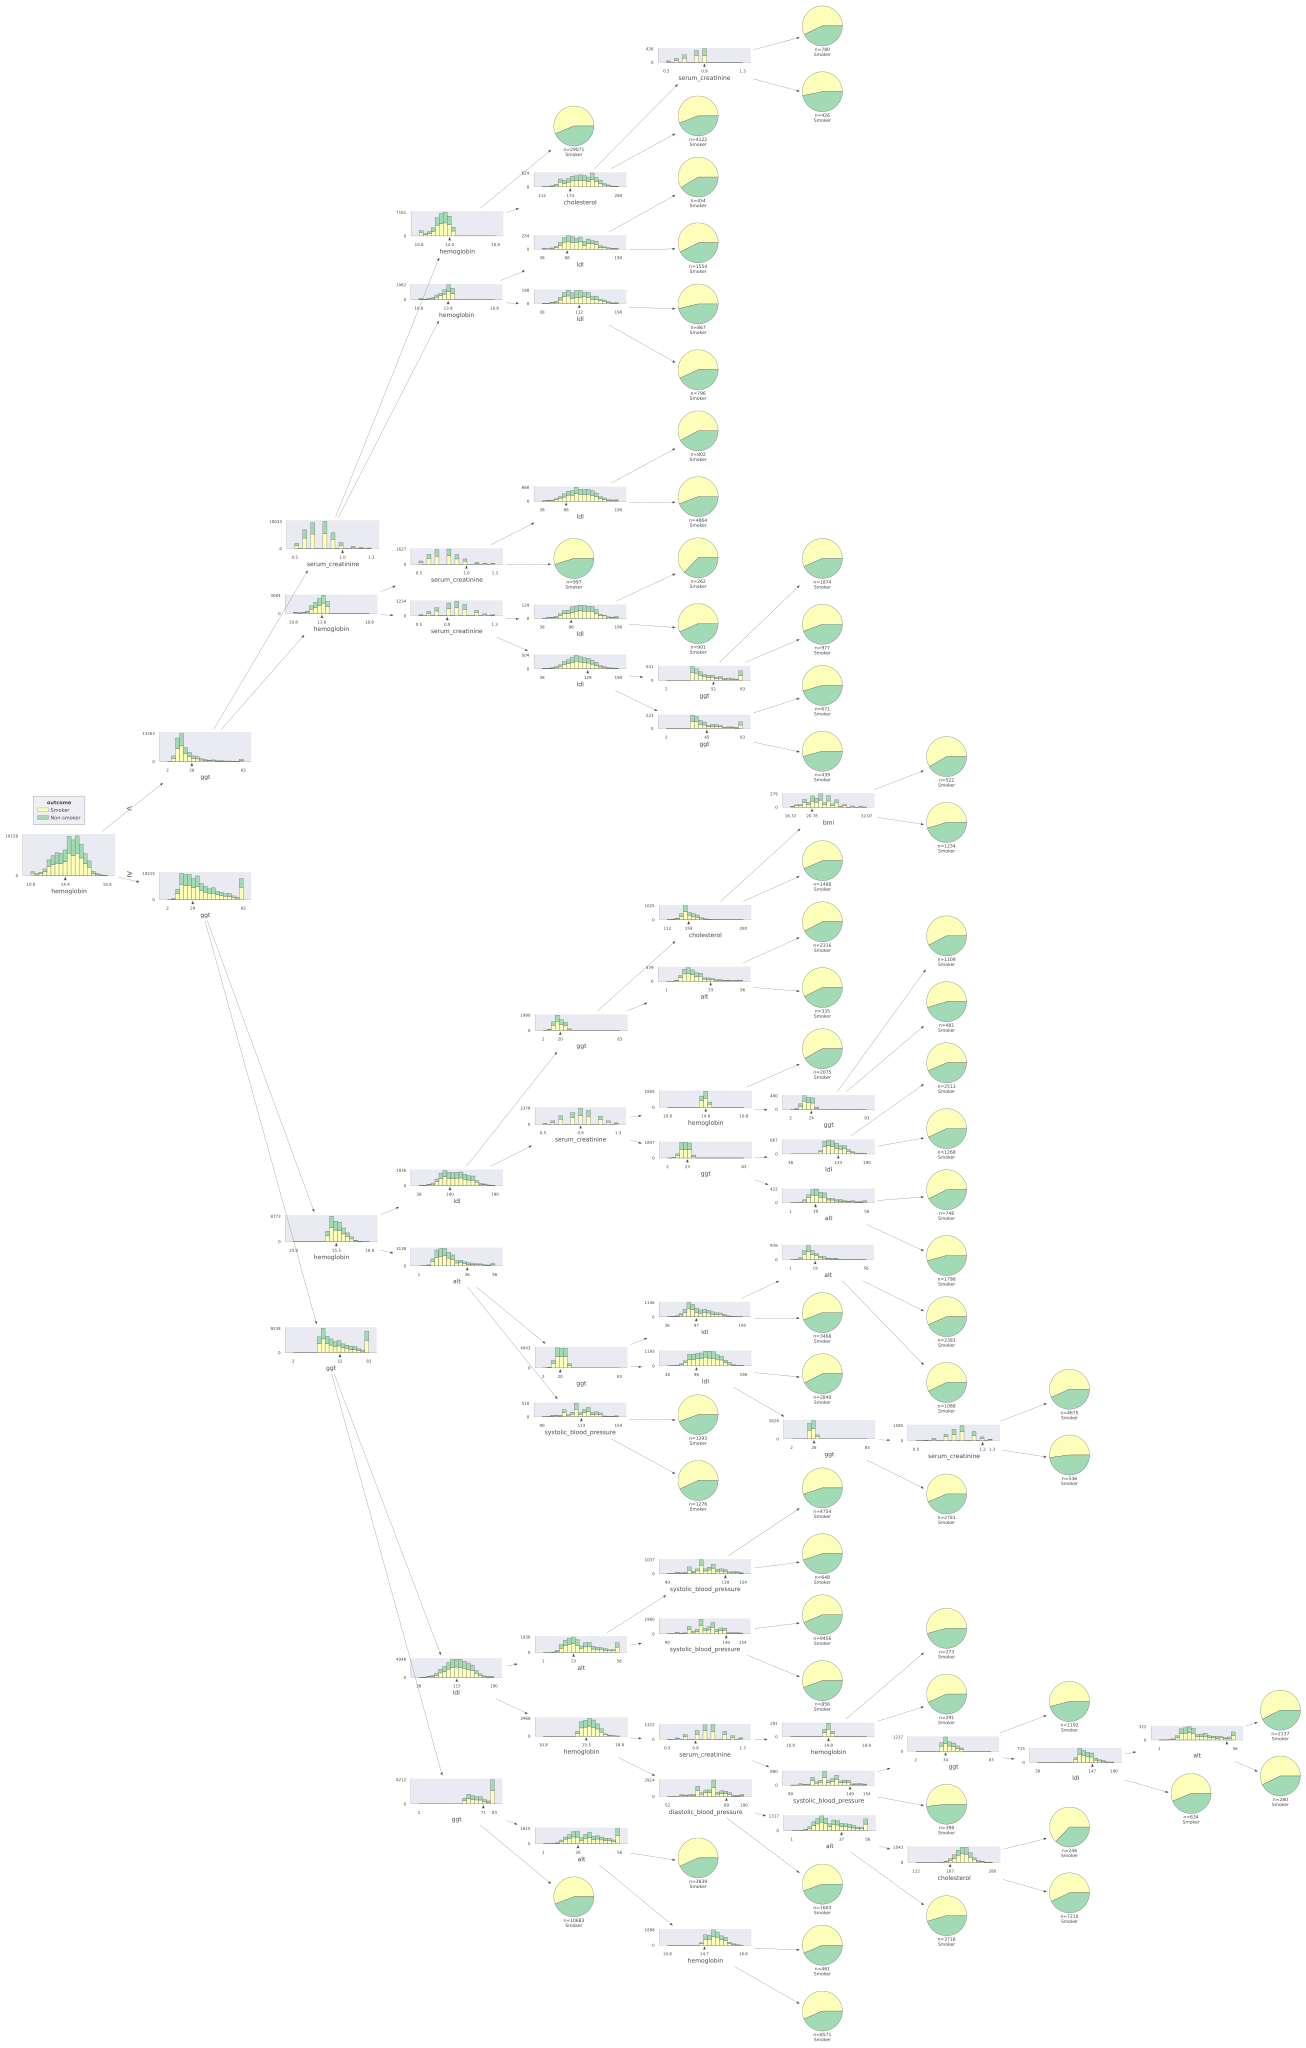

In [176]:
viz_model.view(orientation="LR")

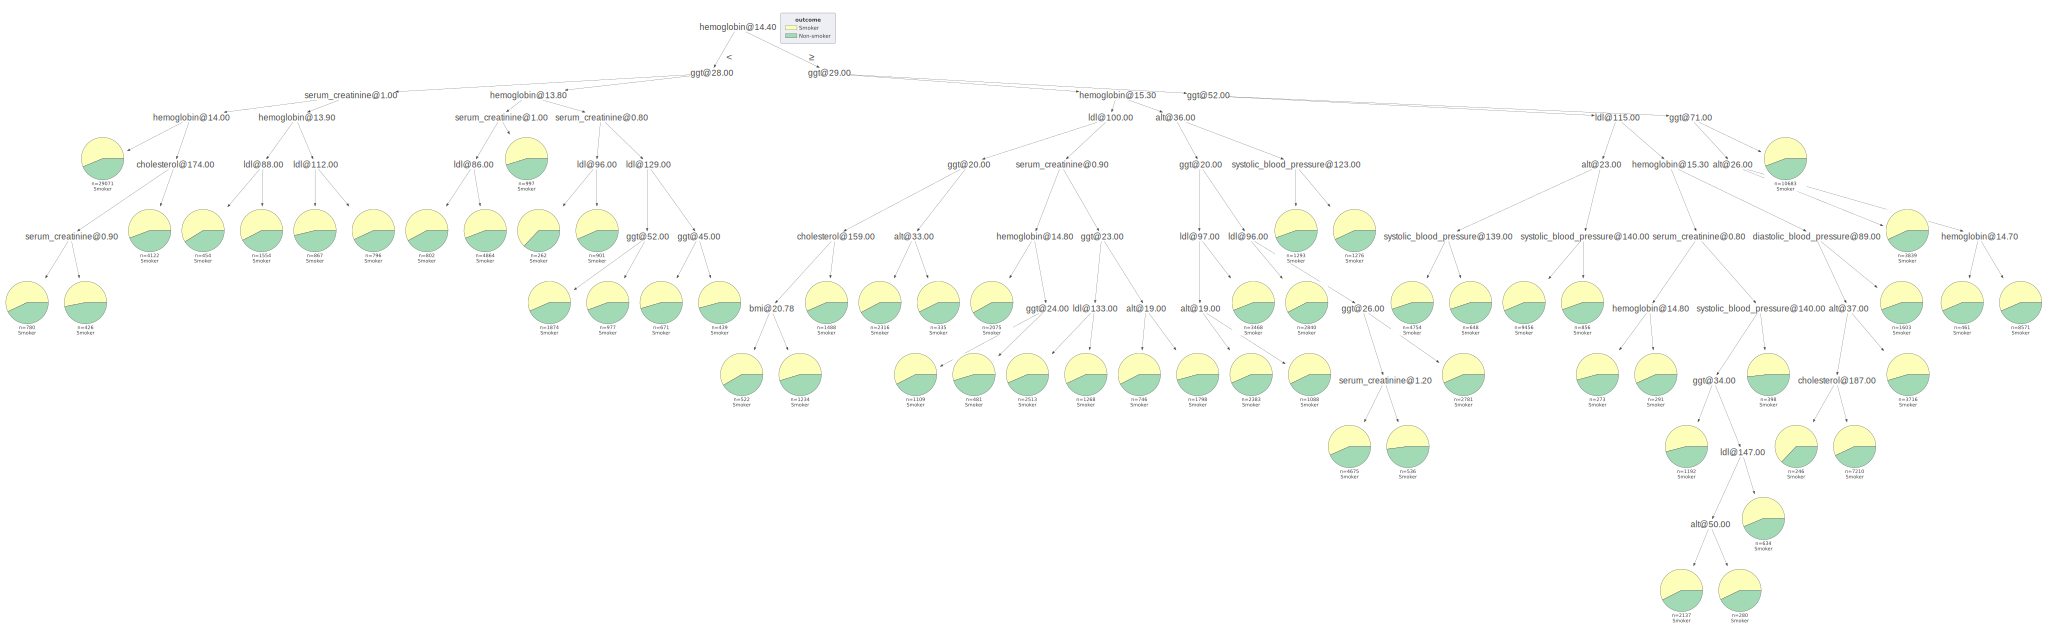

In [177]:
viz_model.view(fancy=False)

### Viewing prediction path of an instance

In [188]:
x = smoking[features].iloc[6857]
x

age                          40.000000
waist                        96.000000
systolic_blood_pressure     107.000000
diastolic_blood_pressure     76.000000
fasting_blood_sugar          97.000000
cholesterol                 189.000000
triglyceride                178.000000
hdl                          38.000000
ldl                         116.000000
hemoglobin                   15.700000
urine_protein                 1.000000
serum_creatinine              1.200000
ast                          30.000000
alt                          37.000000
ggt                          29.000000
dental_caries                 0.000000
hearing                       1.000000
eyesight                      1.200000
bmi                          29.411765
Name: 6857, dtype: float64

/opt/conda/lib/python3.10/site-packages/dtreeviz/models/shadow_decision_tree.py:335: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/opt/conda/lib/python3.10/site-packages/dtreeviz/trees.py:1231: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


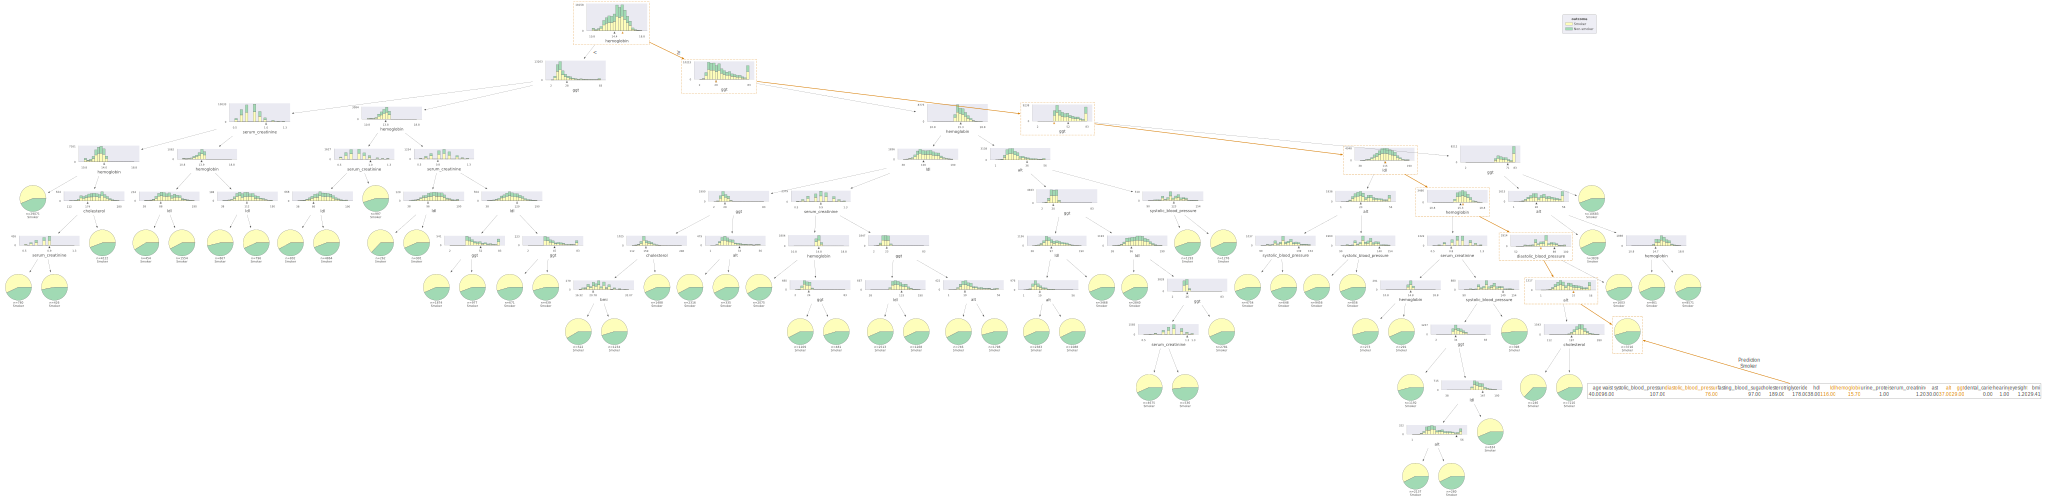

In [185]:
viz_model.view(x=x)

/opt/conda/lib/python3.10/site-packages/dtreeviz/models/shadow_decision_tree.py:335: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/opt/conda/lib/python3.10/site-packages/dtreeviz/trees.py:1231: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


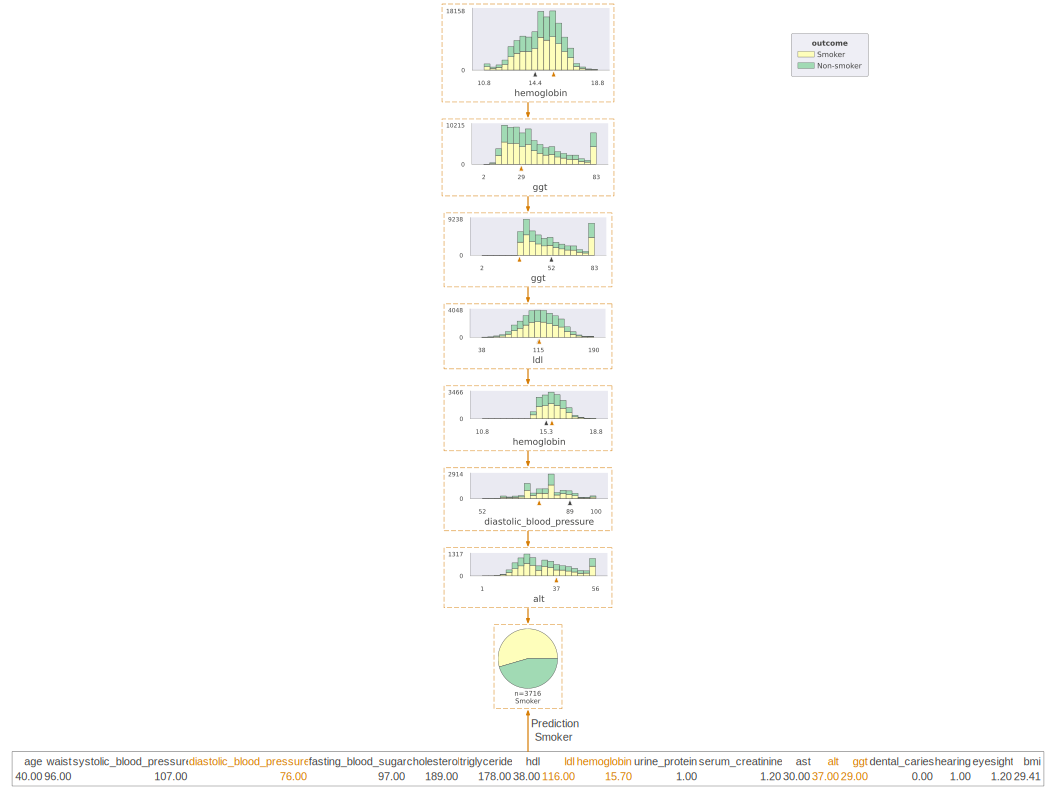

In [189]:
viz_model.view(x=x, show_just_path=True)

In [190]:
print(viz_model.explain_prediction_path(x))

diastolic_blood_pressure < 89.0
115.0 <= ldl 
15.3 <= hemoglobin 
37.0 <= alt 
29.0 <= ggt  < 52.0



/opt/conda/lib/python3.10/site-packages/dtreeviz/models/shadow_decision_tree.py:335: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/opt/conda/lib/python3.10/site-packages/dtreeviz/interpretation.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


### Viewing leaf sizes

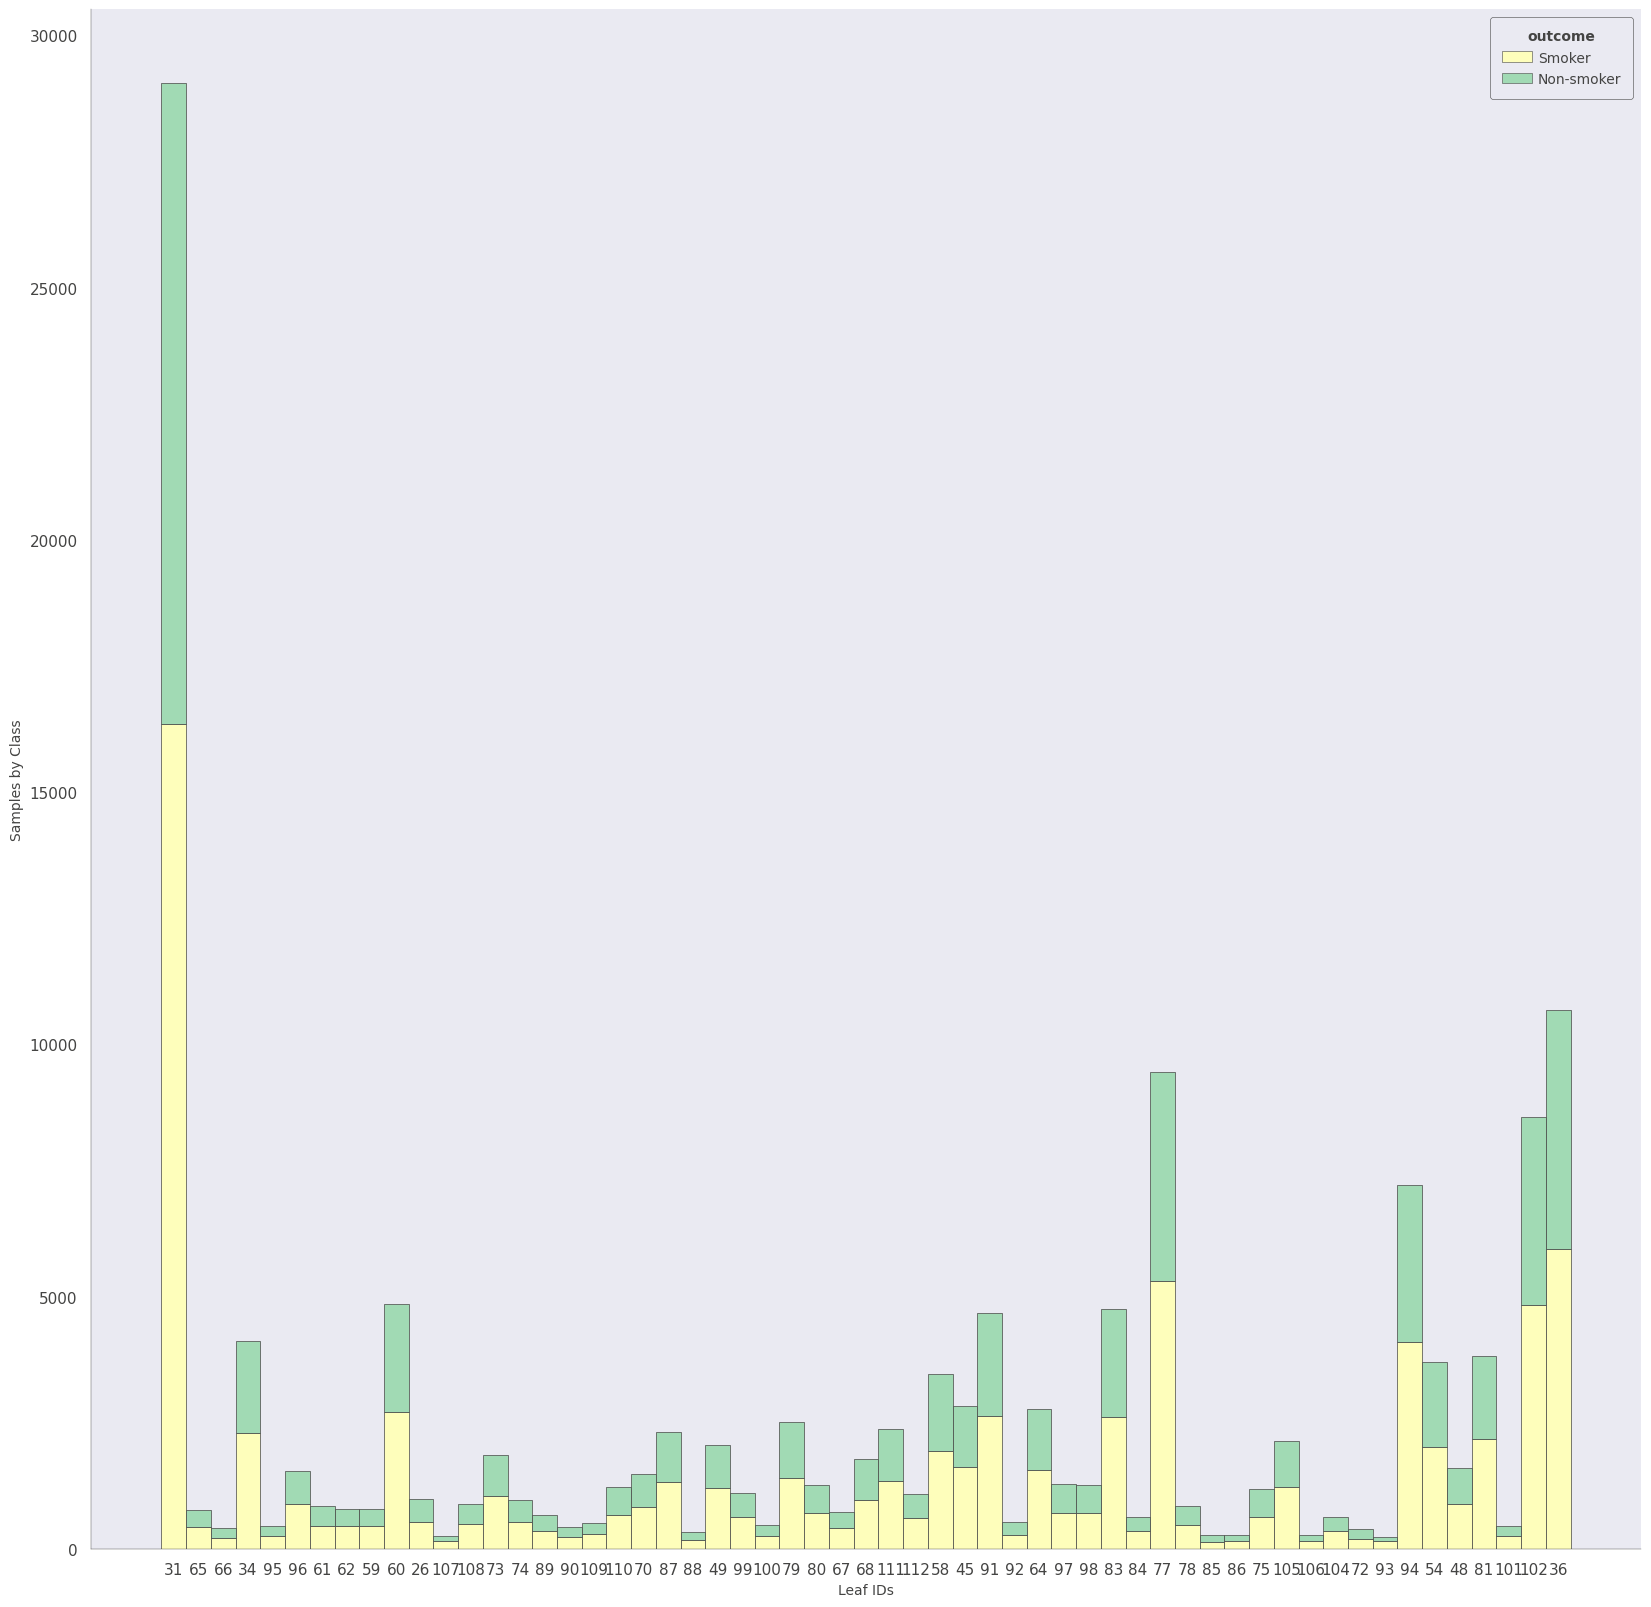

In [191]:
viz_model.ctree_leaf_distributions()

# MODEL EVALUATION

In [201]:
from sklearn.metrics import f1_score
import os 

## Confusion matrix 

In [202]:
y_pred_test = xgboost_model.predict(X_val)

cm = confusion_matrix(y_val, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[6902 2058]
 [1390 5576]]

True Negatives(TN) =  6902

True Positives(TP) =  5576

False Positives(FP) =  2058

False Negatives(FN) =  1390


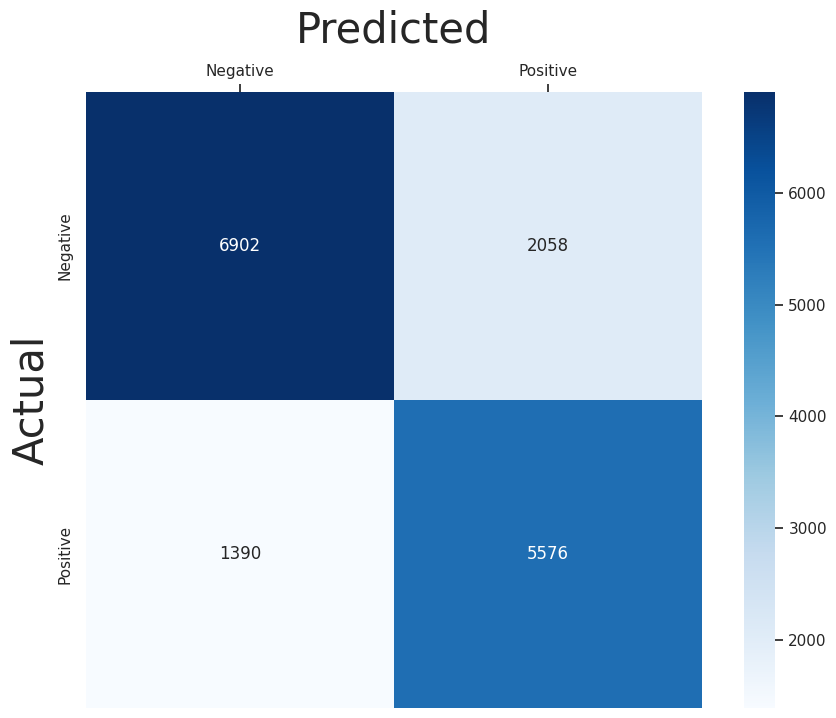

In [203]:
fig, ax = plt.subplots(figsize=(11, 8))

confusion_matrix = pd.DataFrame(data=cm, columns=['Negative', 'Positive'],
                                index=['Negative', 'Positive'])

sns.heatmap(confusion_matrix, annot=True, fmt='', cmap='Blues', square=True)

ax.xaxis.tick_top()
ax.set_title('Predicted', pad=15, fontsize='30')
plt.ylabel('Actual', fontsize='30')
plt.show()

## Classification report 

In [204]:
target_names = ['Smoking absent', 'Smoking present']

print(classification_report(y_val, y_pred_test, target_names=target_names))

                 precision    recall  f1-score   support

 Smoking absent       0.83      0.77      0.80      8960
Smoking present       0.73      0.80      0.76      6966

       accuracy                           0.78     15926
      macro avg       0.78      0.79      0.78     15926
   weighted avg       0.79      0.78      0.78     15926



## F-1 macro score

In [205]:
y_pred = xgboost_model.predict(X_val)

f1_macro = f1_score(y_val, y_pred, average='macro')

print(f'F1 Macro Score: {f1_macro:.4f}')


F1 Macro Score: 0.7820


## Receiver Operating Characteristic Curve 

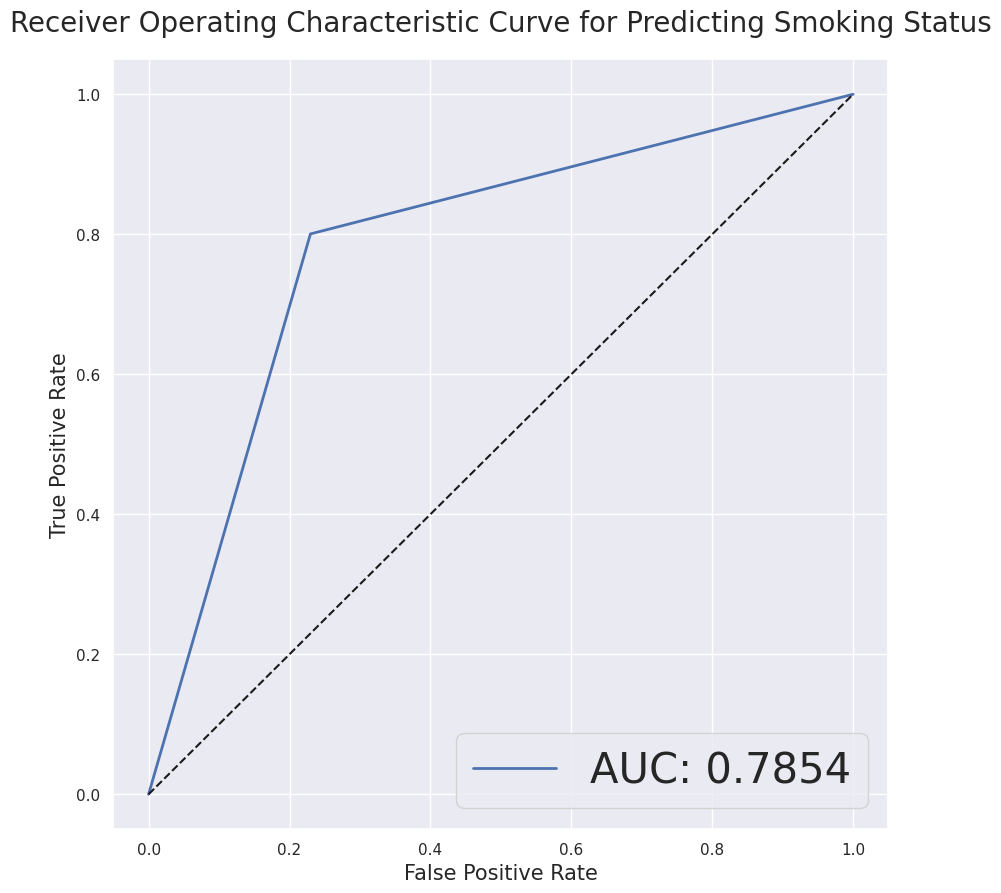

In [206]:
# Calculate AUC 

AUC = roc_auc_score(y_val, y_pred_test)

#Plot ROC

fpr, tpr, thresholds = roc_curve(y_val, y_pred_test, pos_label=True)

plt.figure(figsize=(10, 10))

plt.plot(fpr, tpr, linewidth=2, label="AUC: {:.4f}".format(AUC))

plt.plot([0, 1], [0, 1], 'k--')

plt.title('Receiver Operating Characteristic Curve for Predicting Smoking Status', fontsize=20, pad=20)
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.legend(loc="lower right", fontsize=30)
plt.grid(True)
plt.show()

## Saving model for future use

In [163]:
directory_name = 'smoking'

save_directory = os.getcwd()


directory_path = os.path.join(save_directory, directory_name)              # Create directory 
os.makedirs(directory_path, exist_ok=True)


model_file_name = 'xgboost_model_3_dec_2023_binary_classification_smoking'


model_file_path = os.path.join(directory_path, model_file_name + '.json')  # Save to directory 


xgboost_model.save_model(model_file_path)

